In [1]:
import pandas as pd 
import numpy as np

#visulaization laibary
import matplotlib.pyplot as plt
import seaborn as sns

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# preprocessing steps
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import MinMaxScaler

In [3]:
# diffrent classifier models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb

In [4]:
# loaded diffrent type model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [5]:
# loaded diffrent algorithms
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score
from sklearn.metrics import f1_score,balanced_accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, plot_roc_curve

In [3]:
# loaded dataset of HR for analysis
df= pd.read_csv('HR-Employee-Attrition.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
# Show all columns
pd.set_option('display.max_columns', None)

In [5]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


Now we see all the columns of our dataset

In [6]:
# Getting information related to our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

1. In our dataset 1470 rows and 35 is total columns
2. As we see that there is no null values are present in our dataset
3. In our dataset 26  out of 35 columns  is int type data and other 9 out of 35 columns is object type data.

In [7]:
# check type of dataset
type(df)

pandas.core.frame.DataFrame

In [8]:
# check columns of our dataset
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [9]:
# check null values in dataset
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There is no null values are present in our dataset, now we plot heatmap to see its visulaize version 

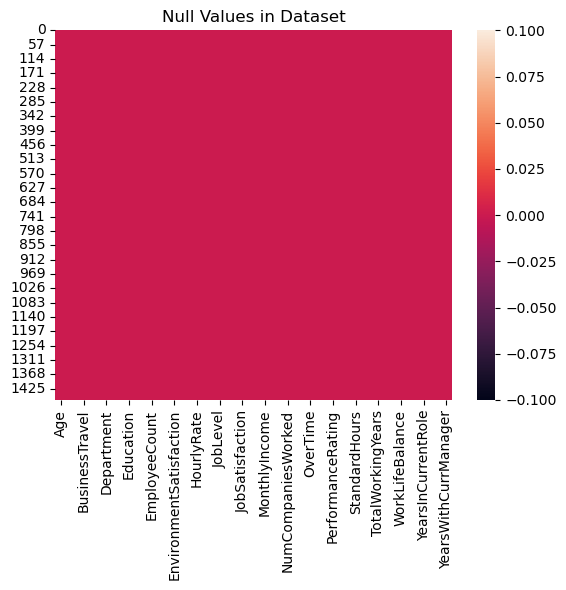

In [10]:
#check null values through heatmap
sns.heatmap(df.isnull())
plt.title('Null Values in Dataset')
plt.show()

In [11]:
# Now check duplicated values in dataset
df.duplicated().sum()

0

There is duplicated values are not present in dataset, Now we further check some other criterion

In [12]:
# check nuique values in dataset
df.nunique().to_frame('No.of Unique values')

,No.of Unique values
Age,43
Attrition,2
BusinessTravel,3
DailyRate,886
Department,3
DistanceFromHome,29
Education,5
EducationField,6
EmployeeCount,1
EmployeeNumber,1470


As we seen that in Employee number and Monthly rate is equal to no. of rows, so we drop it but later.

In [13]:
# Extract columns which contains only 1 unique values
only_one=[]
for i in df.nunique().index:
    if df.nunique()[i]==1:
        only_one.append(i)

In [14]:
# these coumns have only 1 unique values we drop it else it raise difficulties during modelling
only_one

['EmployeeCount', 'Over18', 'StandardHours']

In [15]:
# check white spaces in dataset
df.replace(" ",np.nan)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [16]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [17]:
# Now drop unnecessary columns which heve no relavent in this dataset
df.drop(['EmployeeCount', 'Over18', 'StandardHours','EmployeeNumber','MonthlyRate'],axis=1,inplace= True)

In [18]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,9,No,12,3,4,1,6,3,3,2,2,2,2


In [19]:
df.shape

(1470, 30)

Now we have 30 columns and 1470 rows in dataset

# Now we analysis categorical columns with visulaization

In [20]:
# separate all categorical datse into "categorical variable"
categorical=[]
for i in df.dtypes.index:
    if df.dtypes[i]== 'object':
        categorical.append(i)
categorical

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [21]:
# Now we create a new column of target for better understanding
df['Target']= np.where(df['Attrition']=='Yes',1,0)

Now we have two type of target columns one have categorical and other have numerical type data

In [22]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Target
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,8,Yes,11,3,1,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,1,No,23,4,4,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,6,Yes,15,3,2,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,1,Yes,11,3,3,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,9,No,12,3,4,1,6,3,3,2,2,2,2,0


In [23]:
# import categorical datset for separate analysis on it
df[categorical]

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,No


In categorical dataset we have 1470  rows and 8 columns including with target column " ATTRITION"

## Now we compare categorical data with target column Attrition 

In [24]:
def categorical_func(df, variable,target="Target", invert_axis= False):
    '''we create a categorical function for comparasion other variable with target variable how much they understanding each other'''
    fig, ax= plt.subplots(ncols=2, figsize=(10,5))
    
    # plotting between target and variabel 
    if invert_axis==False:
        sns.barplot(x= variable, y= target, data=df, ax=ax[0])
    else:
        sns.barplot(y= variable, x= target,data=df,ax=ax[0])
    ax[0].set_title(f'Comparision between Target and {variable}')
    
    #pot count plot count the variable item
    if invert_axis==False:
        sns.countplot(x=variable,data=df,hue='Attrition')
    else:
         sns.countplot(y=variable,data=df,hue='Attrition')
    ax[1].set_title(f'Count the how much variabel in {variable}')
    plt.tight_layout()
    plt.show()

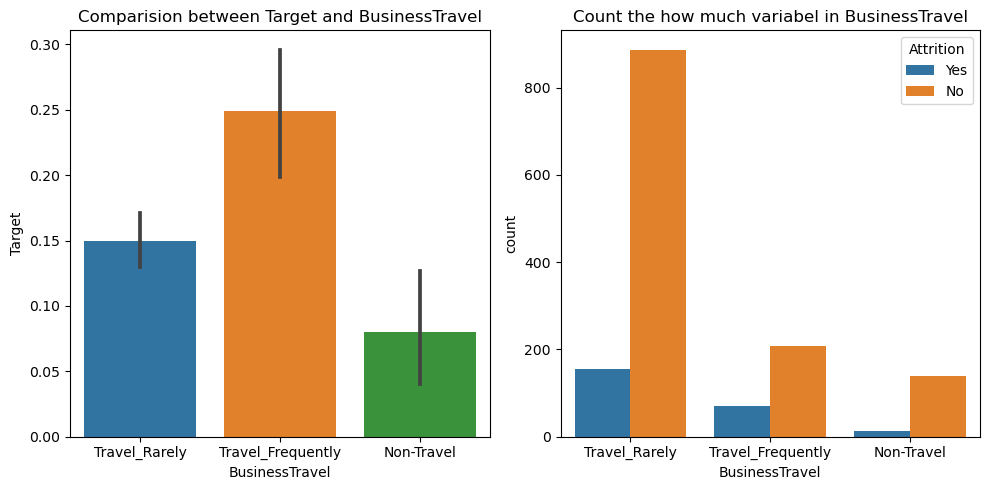

In [25]:
# plot for variable BusinessTravel
categorical_func(df,variable="BusinessTravel")

As we seen that in first diageam person who Travel _Frequently for Business travel ,it chances are increase to leave that company because of many people not like travel.
in other diagram people  travel who ralerly they liked their jobs and not leff. 

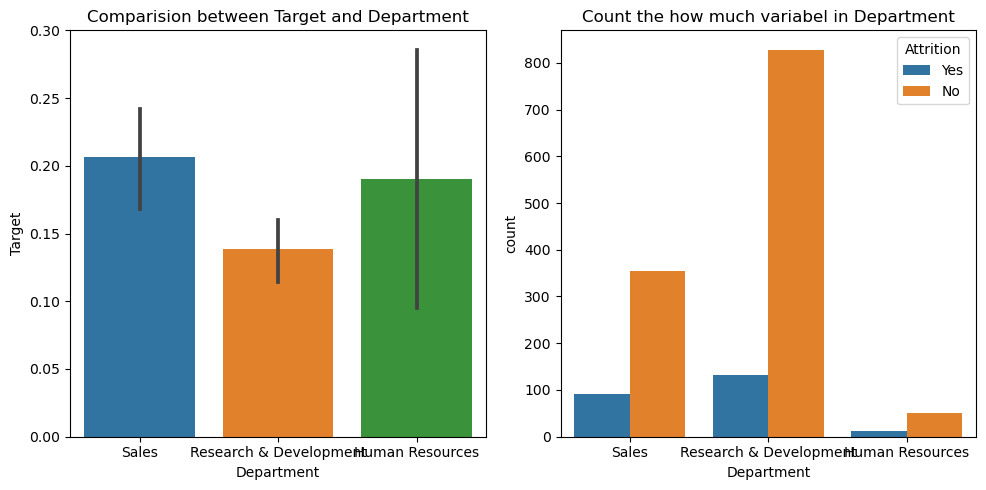

In [26]:
# plot for variable Department
categorical_func(df, variable="Department")

In sales and human resources departemnt many people left their jobs otherweise person who is in R&D Department thir less chances to leave that comapny.

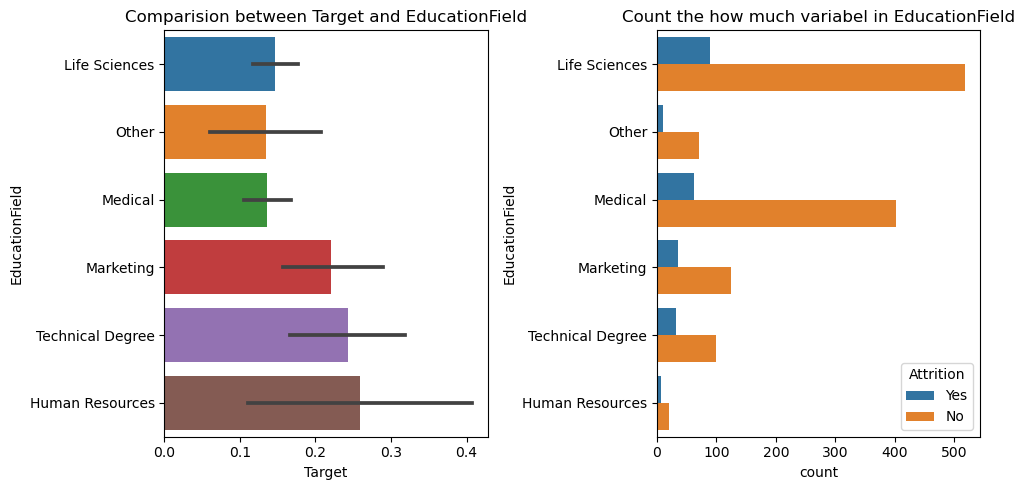

In [27]:
# plot for variable EducationField
categorical_func(df, variable="EducationField", invert_axis=True)

 In EducationField, if person relared to human resources department then their chnces are increse to left job other wise it it relared to life science and mediacl field then their chances are low to leave that comapny

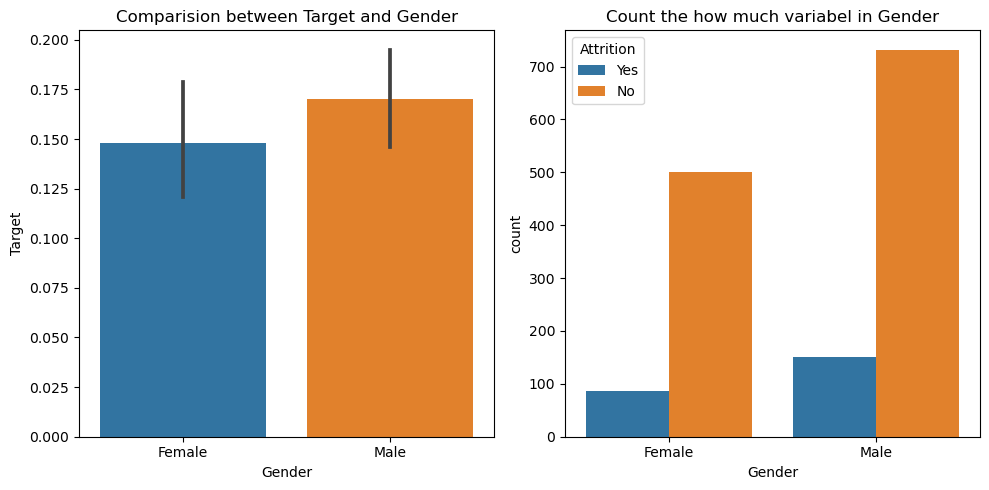

In [28]:
# plot for variable Gender
categorical_func(df, variable="Gender")

Comparision of female, Gender leave their jobs fast 

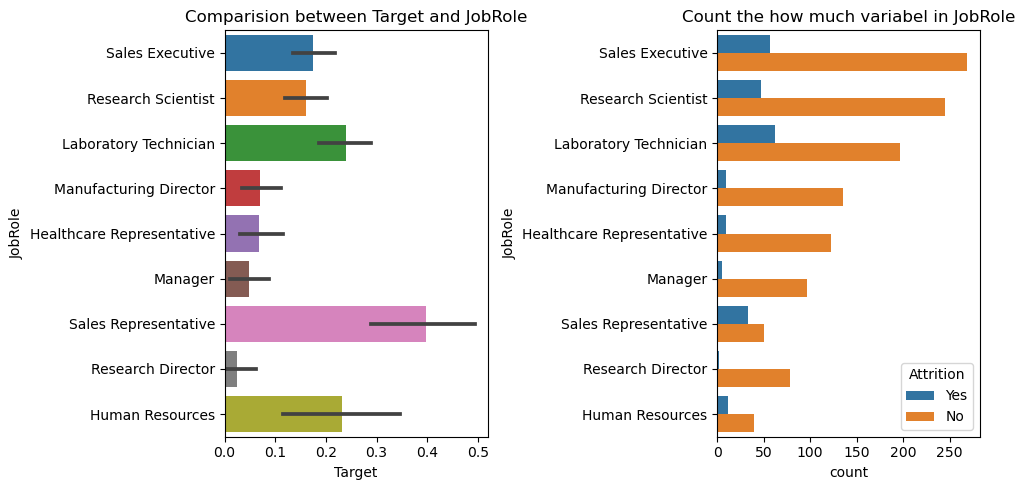

In [29]:
# plot for variable JobeRole
categorical_func(df, variable="JobRole", invert_axis= True)

If person is sales representative then their chances are increse to leave that job comparision to sales executive and research scientist

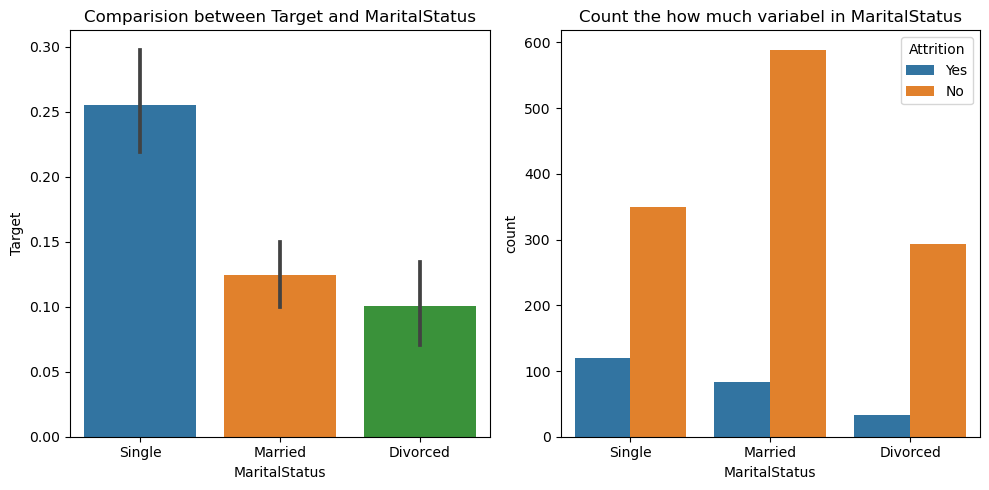

In [30]:
# plot for variable MaritalStatus
categorical_func(df, variable="MaritalStatus")

Single leave their job comapre to married person

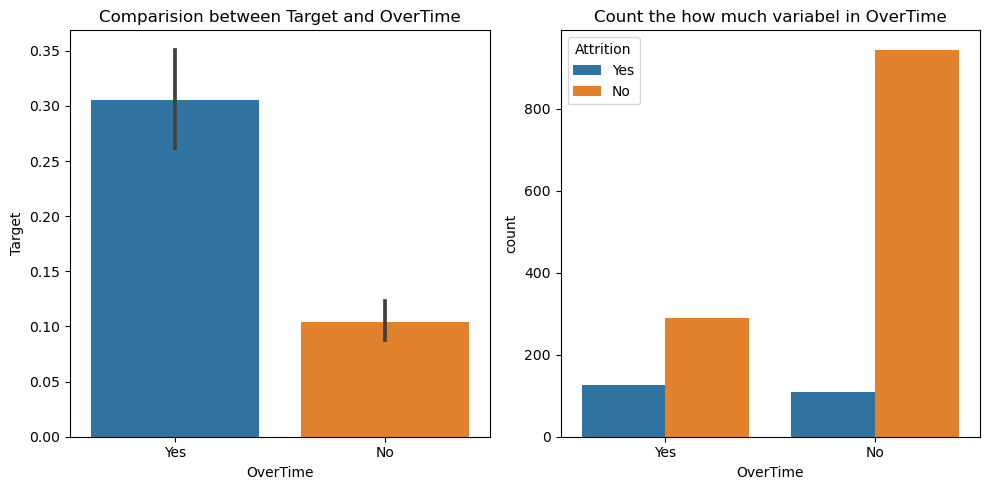

In [31]:
# plot for variable OverTime
categorical_func(df, variable="OverTime")

Most reason to leave job is one of them is over time because modt of people are not liked ober time and they can't manage other thongs

# Uni-varient analysis

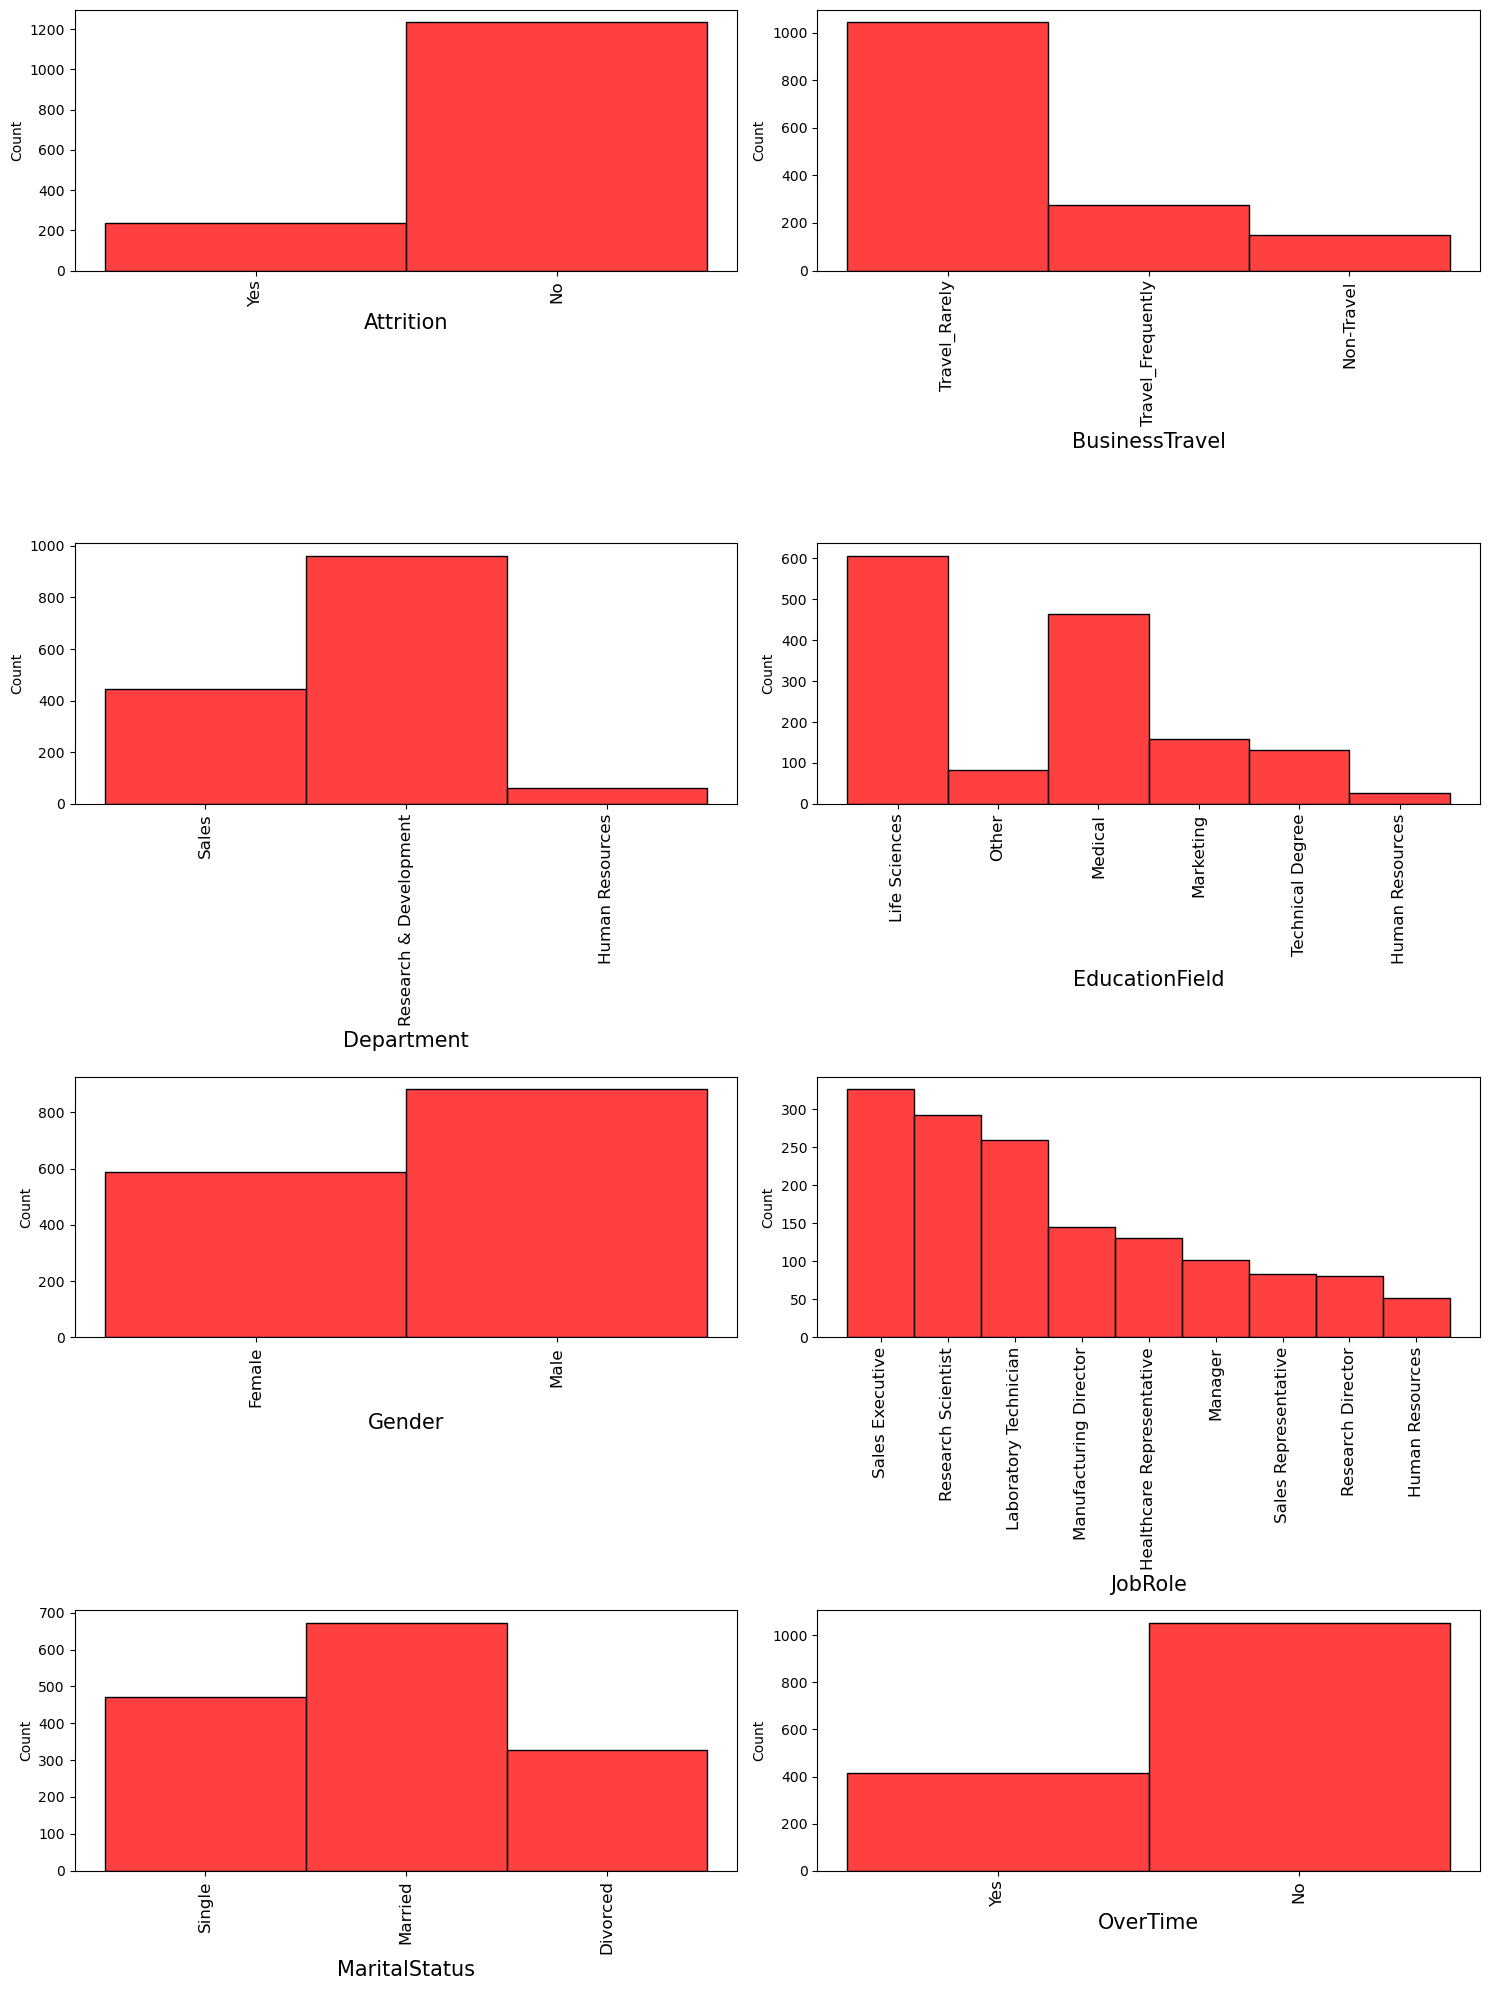

In [32]:
plt.figure(figsize=(15,20), facecolor= 'white')
plt.title('Visulaization Categorical Data With Target Attrition')
plotnumber=1
for col in df[categorical]:
    if plotnumber<=8:
        ax=plt.subplot(4,2,plotnumber)
        sns.histplot(x=df[categorical][col], color='red')
        plt.xlabel(col, fontsize=15)
        plt.xticks(rotation=90)
        plt.xticks(fontsize=12)
    plotnumber+=1
plt.tight_layout()

1. In Business Travel most employess Travel Rarely have occupied most spaces in Company.
2. In Department R&D employess Have occupied most spaces in company.
3. In Education Field Most employee comes from Life Sciences background.
4. Most of employee are Male in Company.
5. Most of employee have job role in company is Sales EXecutive.
6. Most of employee are Married.
7. large number employee not do overtime.

1. Who employee Travel Frequently their most chances for leave that company.
2. Sales and Human Resources employee have most chances for left that company.
3. Employee related to Human Resources and Technical Degree educational field then most chances to leave that company.
4. Male leave company comapare to Female.
5. If employee job role related to sales representative and human resources then major chances to leave that comapny.
6. Single employee leave comany for finding better opputunities.
7. Over time people leave comapny for major work load.

# Now we analysis numerical columns by visulaization method

In [33]:
numerical=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='int64':
        numerical.append(i)
numerical

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

# Relation between numerical variable and target

In [34]:
def numerical_func(df, variable,target="Target", invert_axis= False):
    '''we create a categorical function for comparasion other variable with target variable how much they understanding each other'''
    fig, ax= plt.subplots(ncols=2, figsize=(10,5))
    
    # plotting between target and numerical variabel 
    if invert_axis==False:
        sns.boxplot(x= variable, y= target, data=df, ax=ax[0])
    else:
        sns.boxplot(y= variable, x= target,data=df,ax=ax[0])
    ax[0].set_title(f'Comparision between Target and {variable}')
    
    #pot count plot count the numerical variable item
    if invert_axis==False:
        sns.countplot(x=variable,data=df,hue='Attrition')
    else:
         sns.countplot(y=variable,data=df,hue='Attrition')
    ax[1].set_title(f'Count the how much variabel in {variable}')
    plt.tight_layout()
    plt.show()

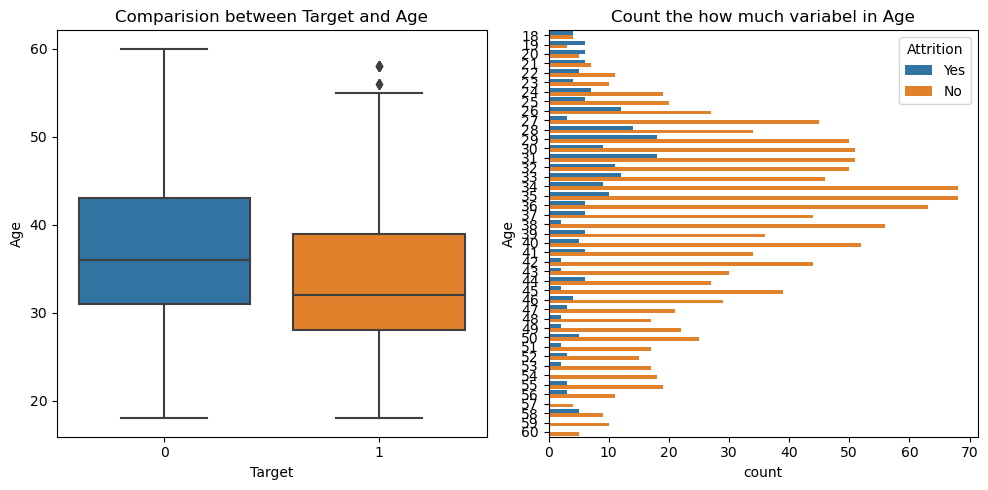

In [35]:
# plot numerical variable age
numerical_func(df, variable='Age', invert_axis=True)

As we know that in age variable min age is 18 an dmaximum age is 60. Most of people between 32 to 42 age leave their jobs but below 32 less chances to leave their job.

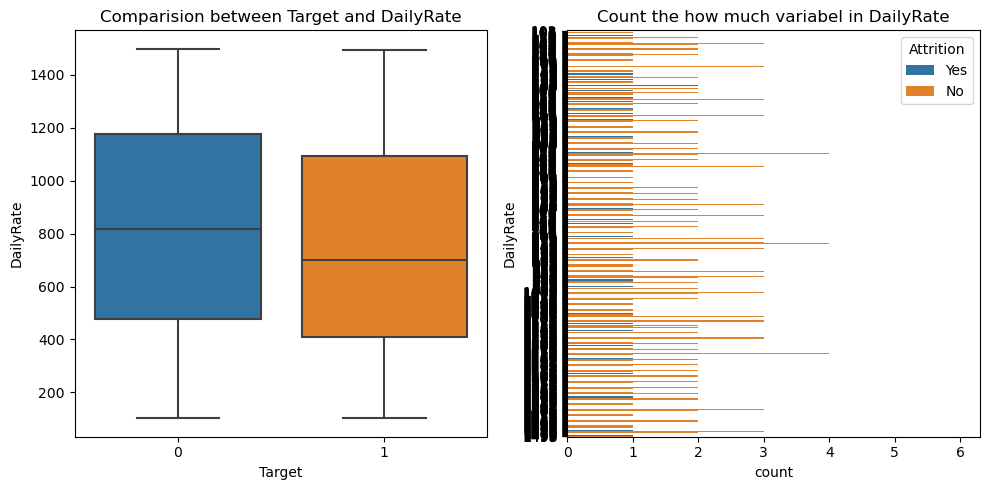

In [36]:
# plot numerical variable DailyRate
numerical_func(df, variable='DailyRate', invert_axis=True)

If daily rate is between 500 to 1200 then less chances to leave that company.

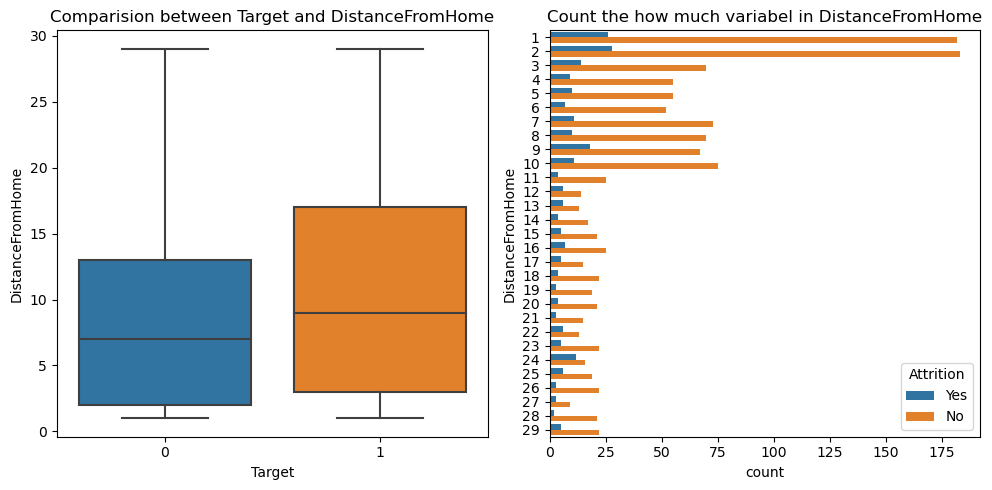

In [37]:
# plot numerical variable DistanceFromHome
numerical_func(df, variable='DistanceFromHome', invert_axis=True)

if distance from home is greather then 12 km then employees left their jobs because of travelling problem.

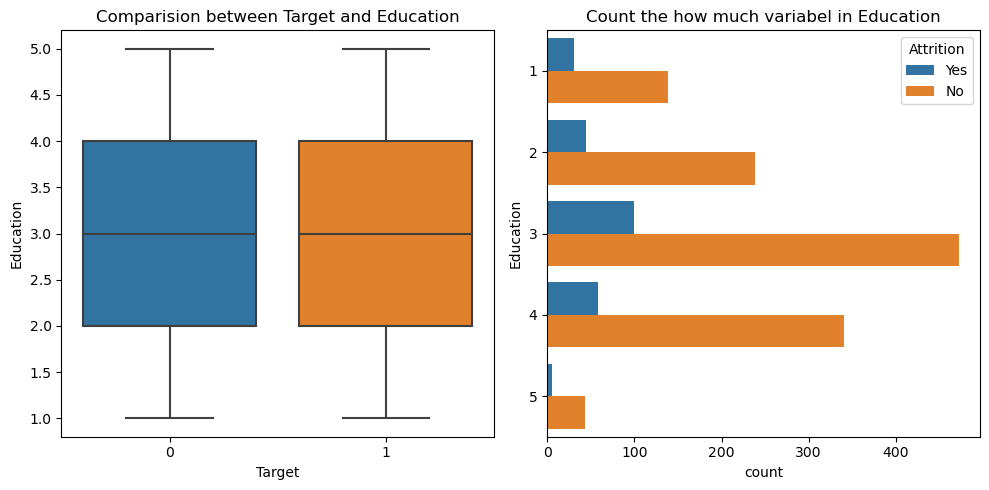

In [38]:
# plot numerical variable Education
numerical_func(df, variable='Education', invert_axis=True)

As we see that in education field both are equal so it look like niot important variable for attrition 

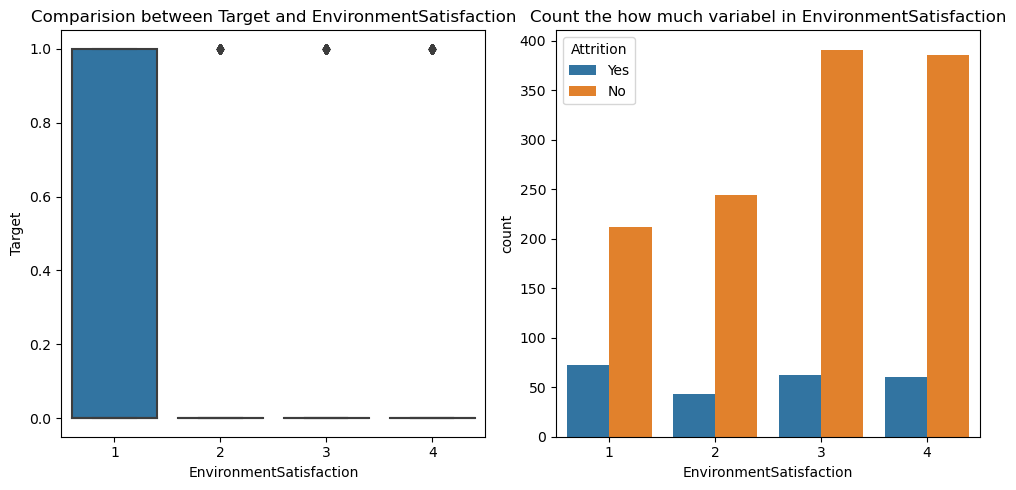

In [39]:
# plot numerical variable EnvironmentSatisfaction
numerical_func(df, variable='EnvironmentSatisfaction')

In environment satisfication look like not emportant data variable

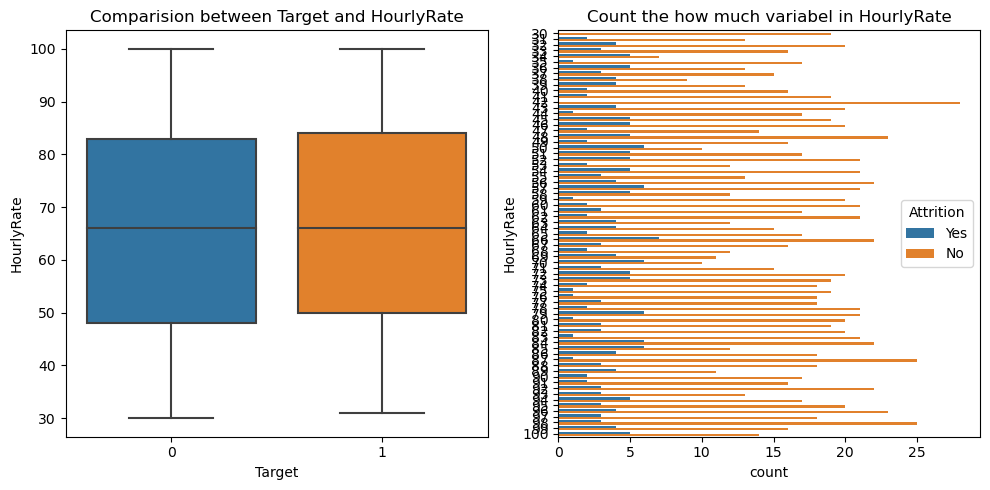

In [40]:
# plot numerical variable HourlyRate
numerical_func(df, variable='HourlyRate', invert_axis=True)

Houly rate is also a important feature to analysis attrition problem because if hours rate is greather than 80 then attrition chances are 
more comapre to less 80.

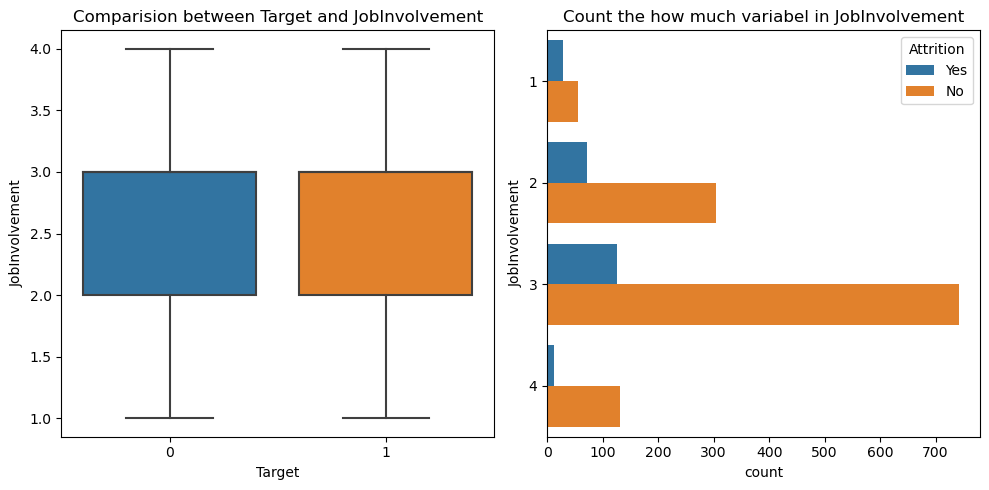

In [41]:
# plot numerical variable JobInvolvement
numerical_func(df, variable='JobInvolvement', invert_axis=True)

Job involvement with target not look like useful, so it is not useful variable for analysis attrition.

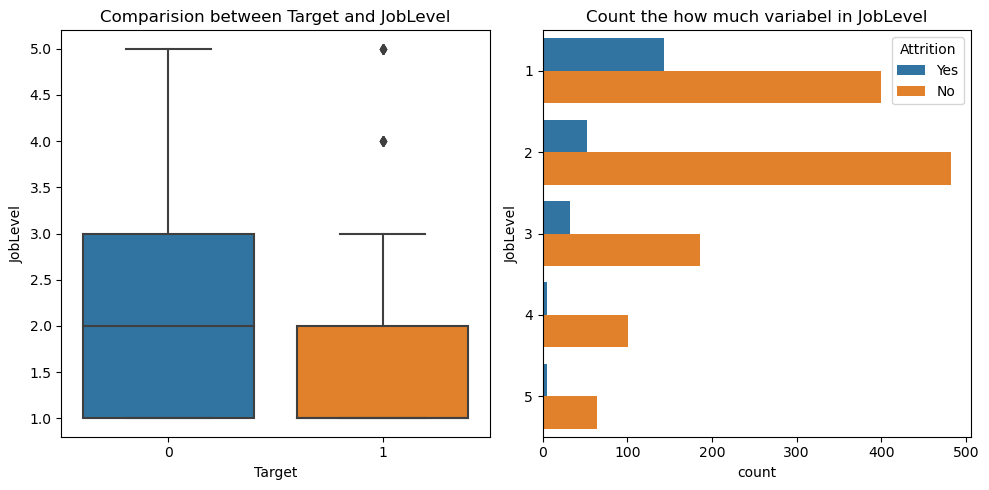

In [42]:
# plot numerical variable JobLevel
numerical_func(df, variable='JobLevel', invert_axis=True)

If job level is upper 2 then it is hard for many employee so attrition problem increases comapre to below 2.

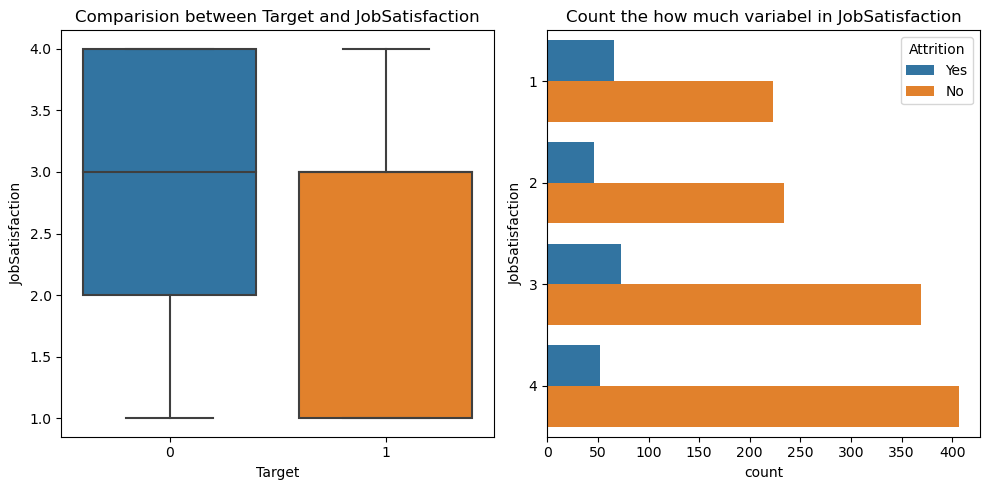

In [43]:
# plot numerical variable JobSatisfaction
numerical_func(df, variable='JobSatisfaction', invert_axis=True)

If employees are not satisfied with their current jobs then attrition chances are more compare to less than 3 level

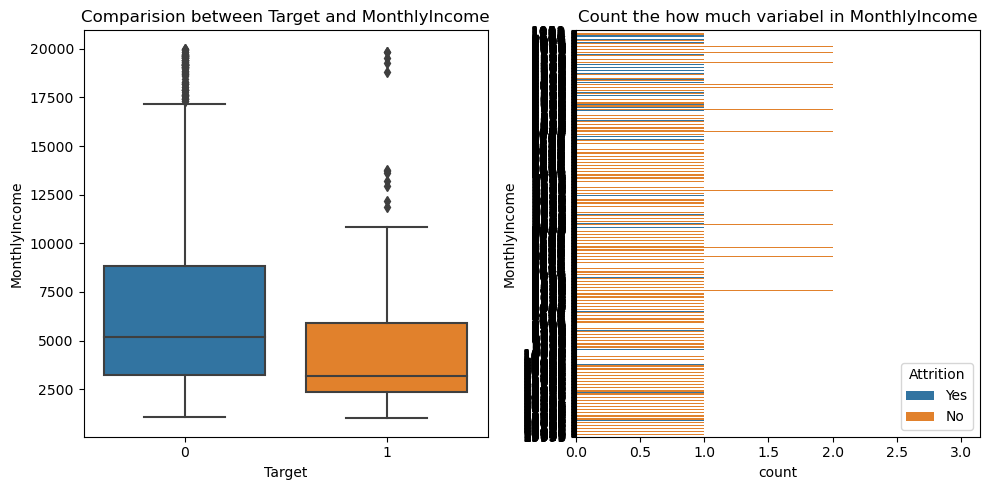

In [44]:
# plot numerical variable MonthlyIncome
numerical_func(df, variable='MonthlyIncome', invert_axis=True)

if monthly income is greather than 8000 then more hances for attrition comapre to 7000 monthly income

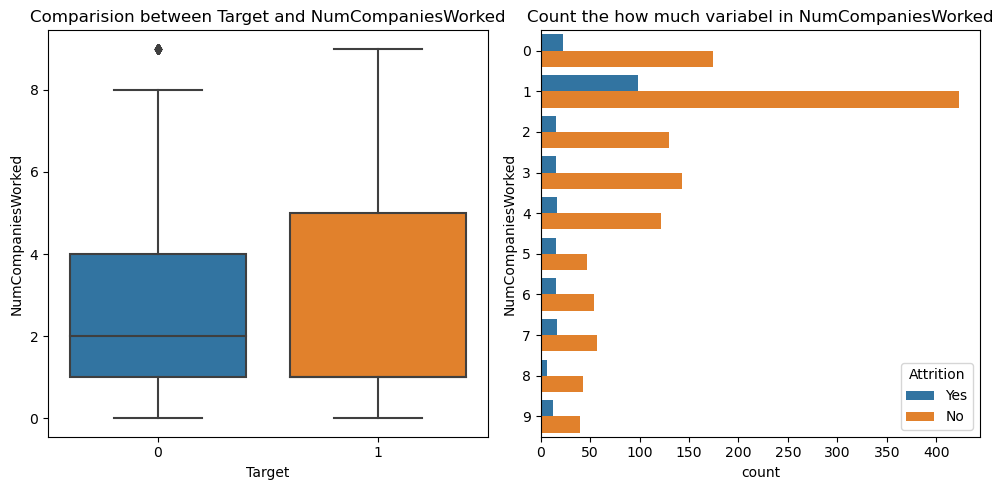

In [45]:
# plot numerical variable NumCompaniesWorked
numerical_func(df, variable='NumCompaniesWorked', invert_axis=True)

if employee worked less than 4 companies then their chances to low for attrition comapare to more than 4.

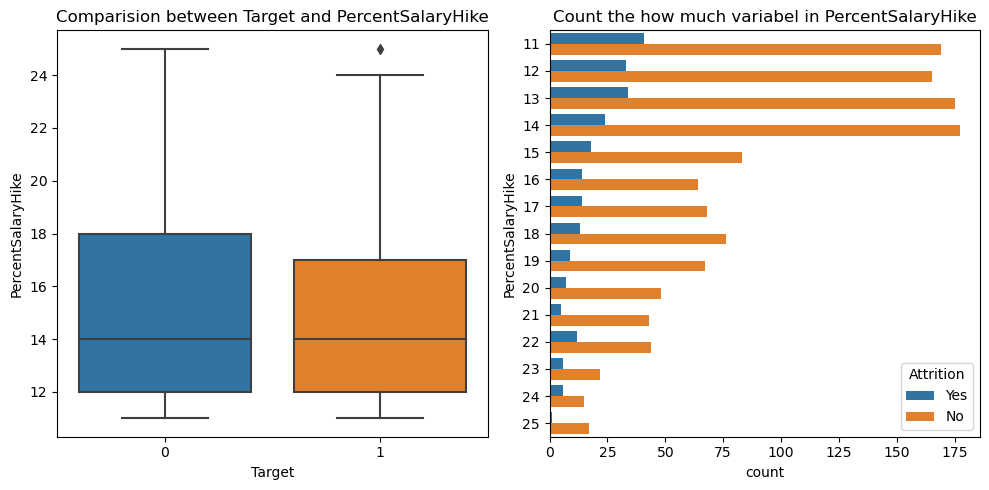

In [46]:
# plot numerical variable PercentSalaryHike
numerical_func(df, variable='PercentSalaryHike', invert_axis=True)

if %of salary hike is more than 18 to more chances to attrition compare to below 17%

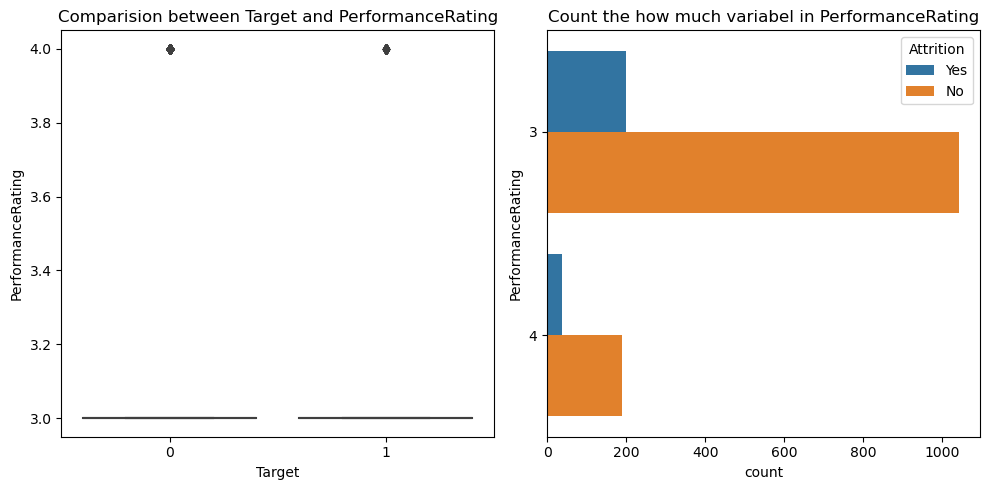

In [47]:
# plot numerical variable PerformanceRating
numerical_func(df, variable='PerformanceRating', invert_axis=True)

Performance rating is not important criterion for analysis attrition problem.

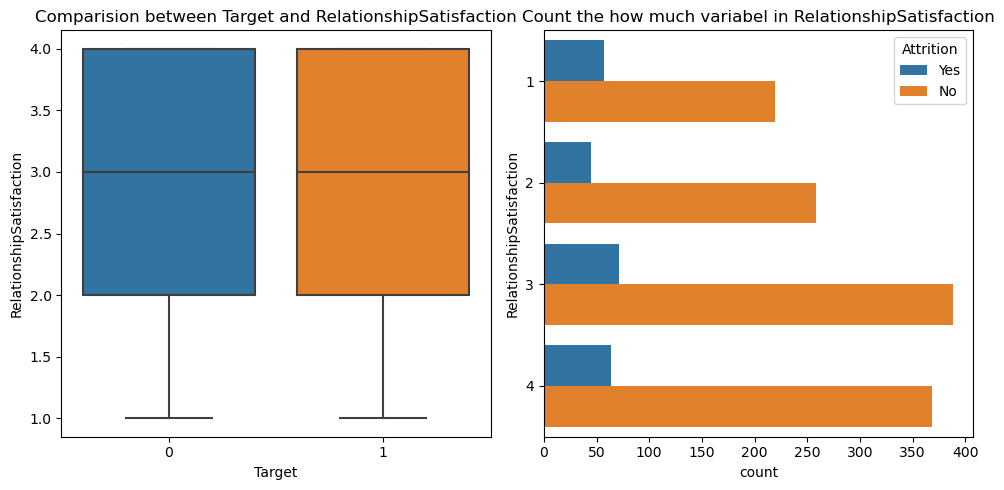

In [48]:
# plot numerical variable RelationshipSatisfaction
numerical_func(df, variable='RelationshipSatisfaction', invert_axis=True)

Relationship satisfications also not matched with target attrition so it is also not important crioterion for calciulating attrition pboblem.

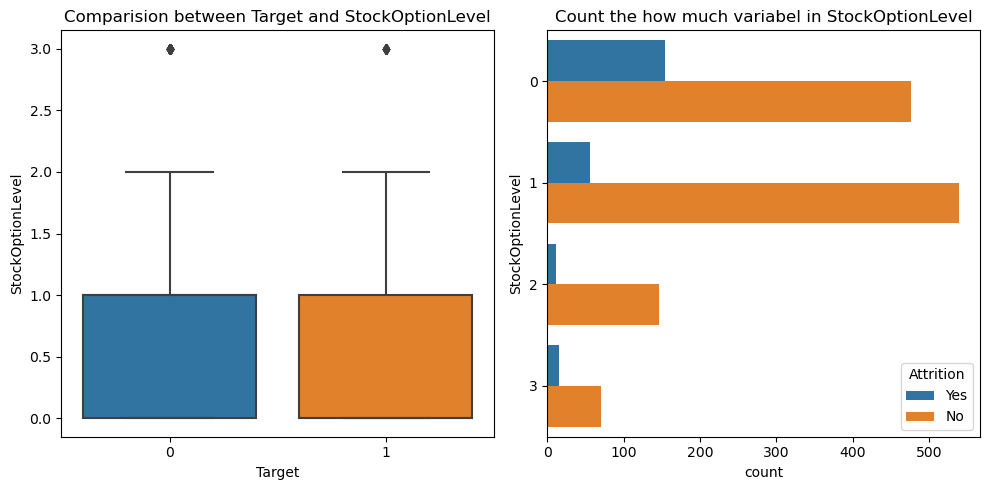

In [49]:
# plot numerical variable StockOptionLevel
numerical_func(df, variable='StockOptionLevel', invert_axis=True)

Stock optional level also equally matched with target attrition so it is also not important criterion for calculating attrition pboblem.

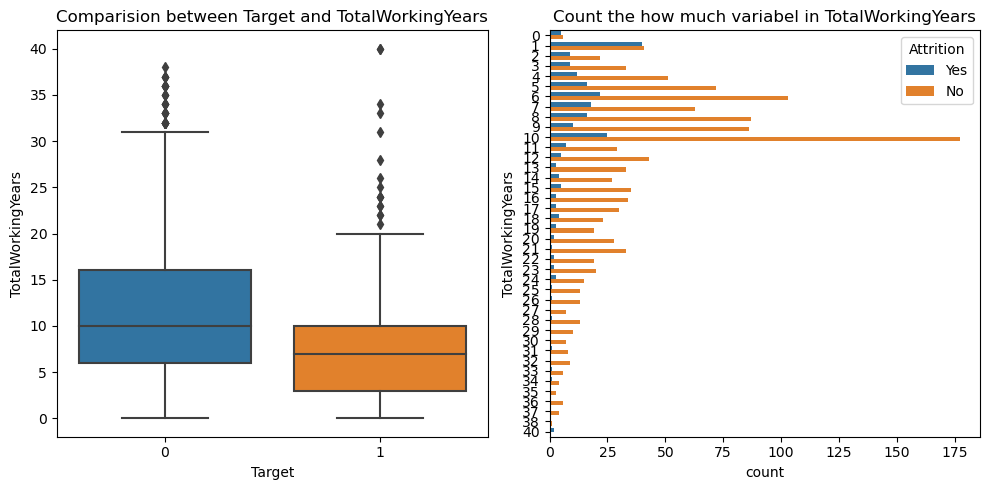

In [50]:
# plot numerical variable TotalWorkingYears
numerical_func(df, variable='TotalWorkingYears', invert_axis=True)

If total working year in that comapny is more than 15 years then attrition chances are less comapre to below 10 years.

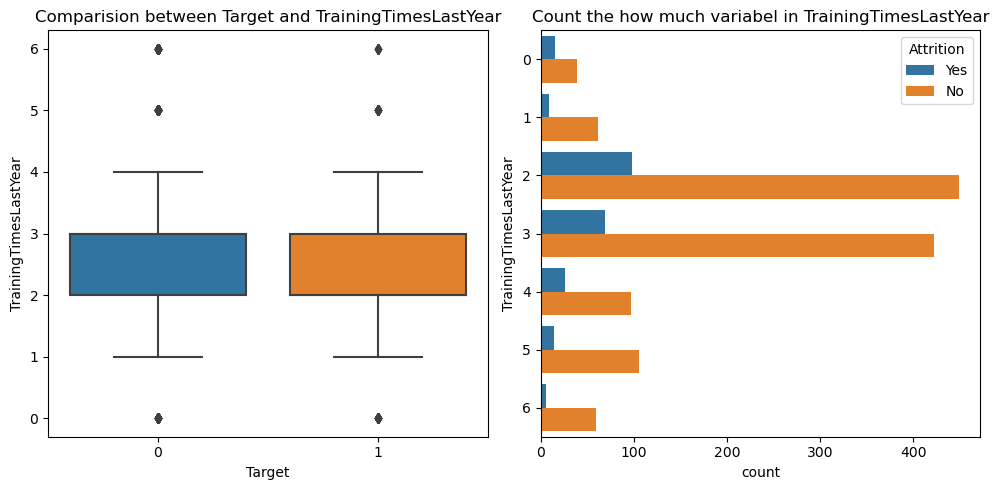

In [51]:
# plot numerical variable TrainingTimesLastYear
numerical_func(df, variable='TrainingTimesLastYear', invert_axis=True)

Training time last year is equally same to target so it is not important varible to solve attrition problem.

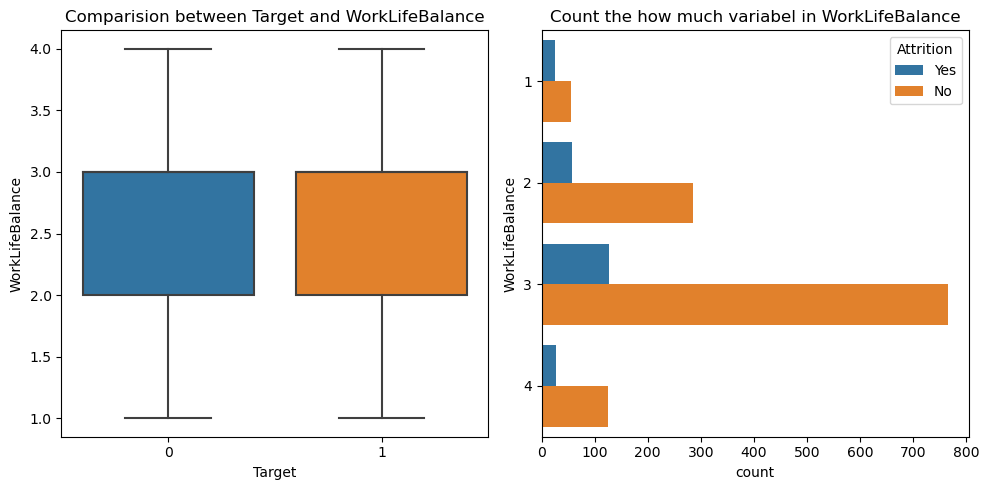

In [52]:
# plot numerical variable WorkLifeBalance
numerical_func(df, variable='WorkLifeBalance', invert_axis=True)

Work life Balance is equally same to target so it is not important varible to solve attrition problem.

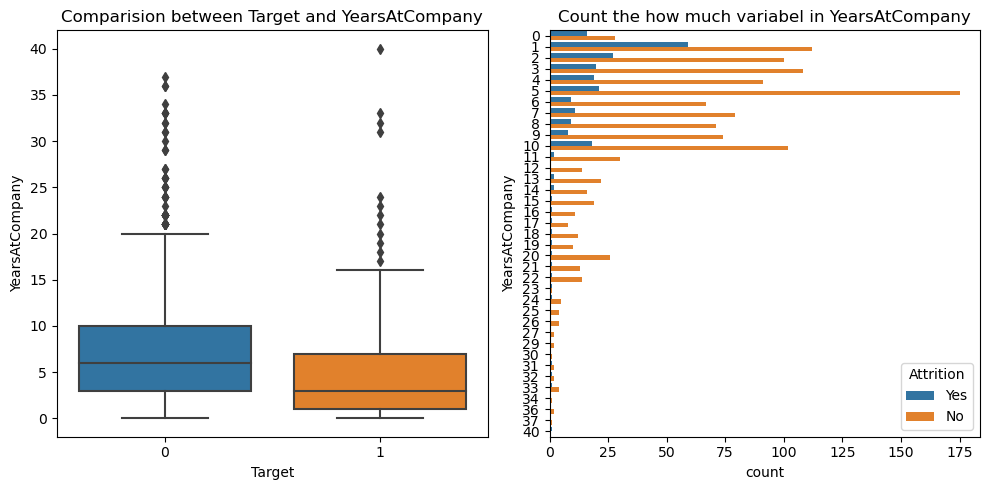

In [53]:
# plot numerical variable YearsAtCompany
numerical_func(df, variable='YearsAtCompany', invert_axis=True)

If years at particular company is more than 10 years then attrition chances is more compare to below 8 years.

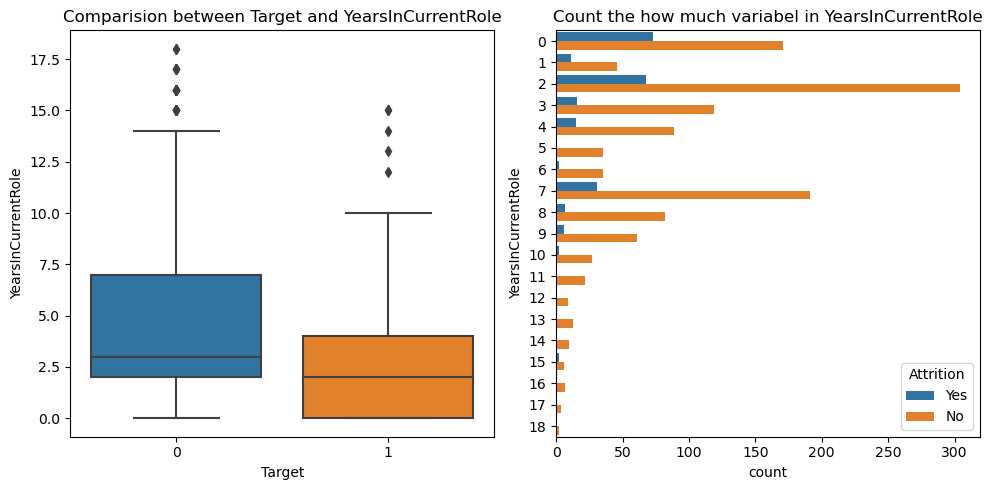

In [54]:
# plot numerical variable YearsInCurrentRole
numerical_func(df, variable='YearsInCurrentRole', invert_axis=True)

If current role year is in comapny is more than 7 years then atrition chances are more compare to below 5 years.

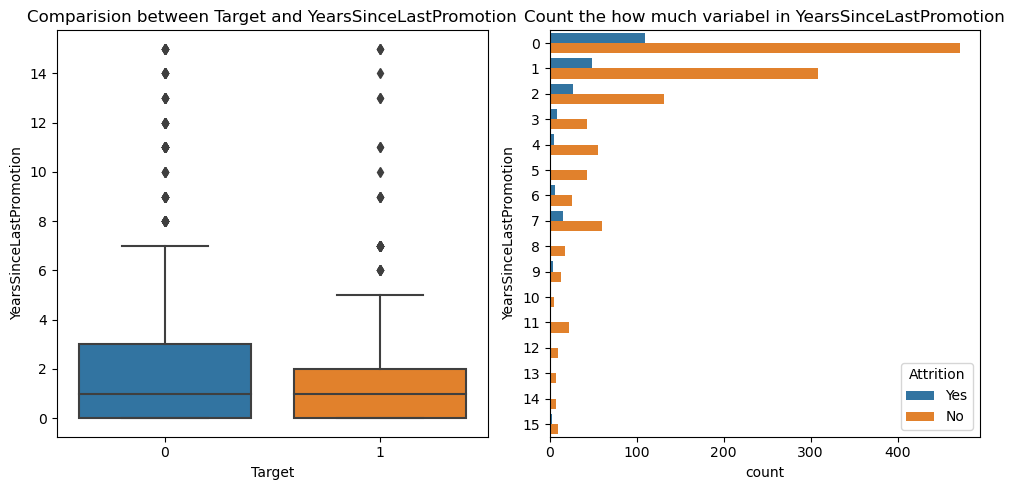

In [55]:
# plot numerical variable YearsSinceLastPromotion
numerical_func(df, variable='YearsSinceLastPromotion', invert_axis=True)

if year since last promotion is grteater than 3 years than attrition chances are more compare to below 2 years.

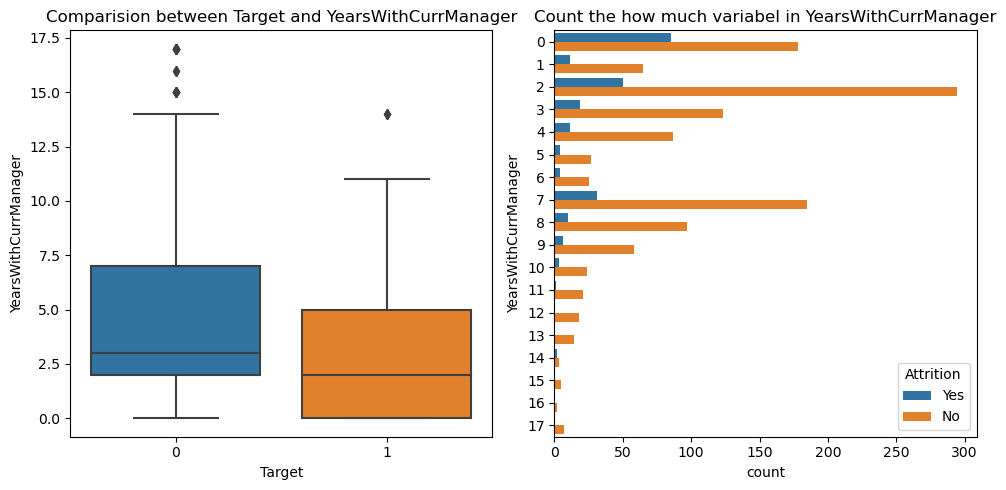

In [56]:
# plot numerical variable YearsWithCurrManager
numerical_func(df, variable='YearsWithCurrManager', invert_axis=True)

If years with current manager is greather than 7 year than chance sof attrition is more.

# Now check our target stats

No     1233
Yes     237
Name: Attrition, dtype: int64

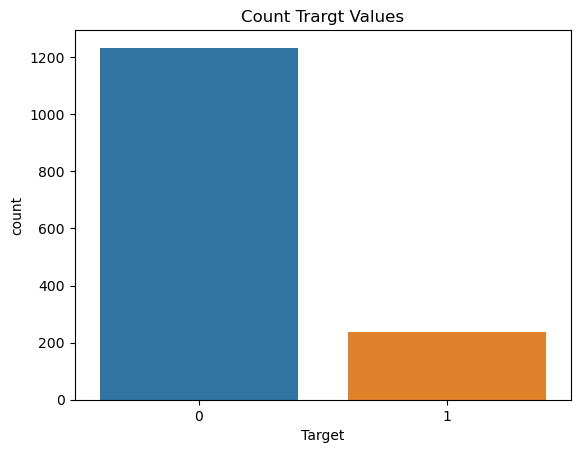

In [57]:
sns.countplot(x=df.Target)
plt.title('Count Trargt Values')
df.Attrition.value_counts()

As we see that our target is imbalanced so we solve it later.

# Now changes categorical data into numerical form1

In [58]:
# change categorical data variable into numerical type
le=LabelEncoder()
for i in categorical:
    df[i]=le.fit_transform(df[i])

In [59]:
df.head()  #check data after changing object into int tyoe

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Target
0,41,1,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,8,1,11,3,1,0,8,0,1,6,4,0,5,1
1,49,0,1,279,1,8,1,1,3,1,61,2,2,6,2,1,5130,1,0,23,4,4,1,10,3,3,10,7,1,7,0
2,37,1,2,1373,1,2,2,4,4,1,92,2,1,2,3,2,2090,6,1,15,3,2,0,7,3,3,0,0,0,0,1
3,33,0,1,1392,1,3,4,1,4,0,56,3,1,6,3,1,2909,1,1,11,3,3,0,8,3,3,8,7,3,0,0
4,27,0,2,591,1,2,1,3,1,1,40,3,1,2,2,1,3468,9,0,12,3,4,1,6,3,3,2,2,2,2,0


In [60]:
# Now we drop our making target columns because it no longer use later
df.drop(['Attrition'],axis=1, inplace =True)

In [61]:
# Now we check information about data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   BusinessTravel            1470 non-null   int32
 2   DailyRate                 1470 non-null   int64
 3   Department                1470 non-null   int32
 4   DistanceFromHome          1470 non-null   int64
 5   Education                 1470 non-null   int64
 6   EducationField            1470 non-null   int32
 7   EnvironmentSatisfaction   1470 non-null   int64
 8   Gender                    1470 non-null   int32
 9   HourlyRate                1470 non-null   int64
 10  JobInvolvement            1470 non-null   int64
 11  JobLevel                  1470 non-null   int64
 12  JobRole                   1470 non-null   int32
 13  JobSatisfaction           1470 non-null   int64
 14  MaritalStatus             1470 non-null 

Now we have 30 columns including target columns and 1470 rows.

# Now check Statistic of Dataset

In [62]:
# statistic of dataset
df.describe()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Target
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,2.721769,0.600000,65.891156,2.729932,2.063946,4.458503,2.728571,1.097279,6502.931293,2.693197,0.282993,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129,0.161224
std,9.135373,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,1.093082,0.490065,20.329428,0.711561,1.106940,2.461821,1.102846,0.730121,4707.956783,2.498009,0.450606,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136,0.367863
min,18.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,30.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1009.000000,0.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,2.000000,0.000000,48.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2911.000000,1.000000,0.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000
50%,36.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,3.000000,1.000000,66.000000,3.000000,2.000000,5.000000,3.000000,1.000000,4919.000000,2.000000,0.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000
75%,43.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,4.000000,1.000000,83.750000,3.000000,3.000000,7.000000,4.000000,2.000000,8379.000000,4.000000,1.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,0.000000
max,60.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,4.000000,1.000000,100.000000,4.000000,5.000000,8.000000,4.000000,2.000000,19999.000000,9.000000,1.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,1.000000


1. As we see that in our dataset count all values are same mean there is no null values are present.
2. Right side Skewness--> Age, Attrition, Daily Rate, Departement, Distance From Home, Education Field, EmployeeNumber, 
                           
3. Left side Skewness--> Business Travel, Education, Environment Satisfication, Gender,   HourlyRate,JobInvolvement,Joblevel,
                         JobRole, Jobsatisfication, MaritalStatus, MONTHLYIncome,MONTHLYrate,NumCompaniesWorked,PercentSalaryHike,
                        RelationshipSatisfaction, StockOptionLevel,TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance,
                        YearsAtCompany, YearsInCurrentRole
4. Outliers--> Age, Daily rate, Distancefrom Home, Employee Number, HourlyRate, Monthly Income, Monthly Rate, Total WorkingYears,
              years at comapny

# Now we check all statistic by the help of Visulaization

# Check skewness

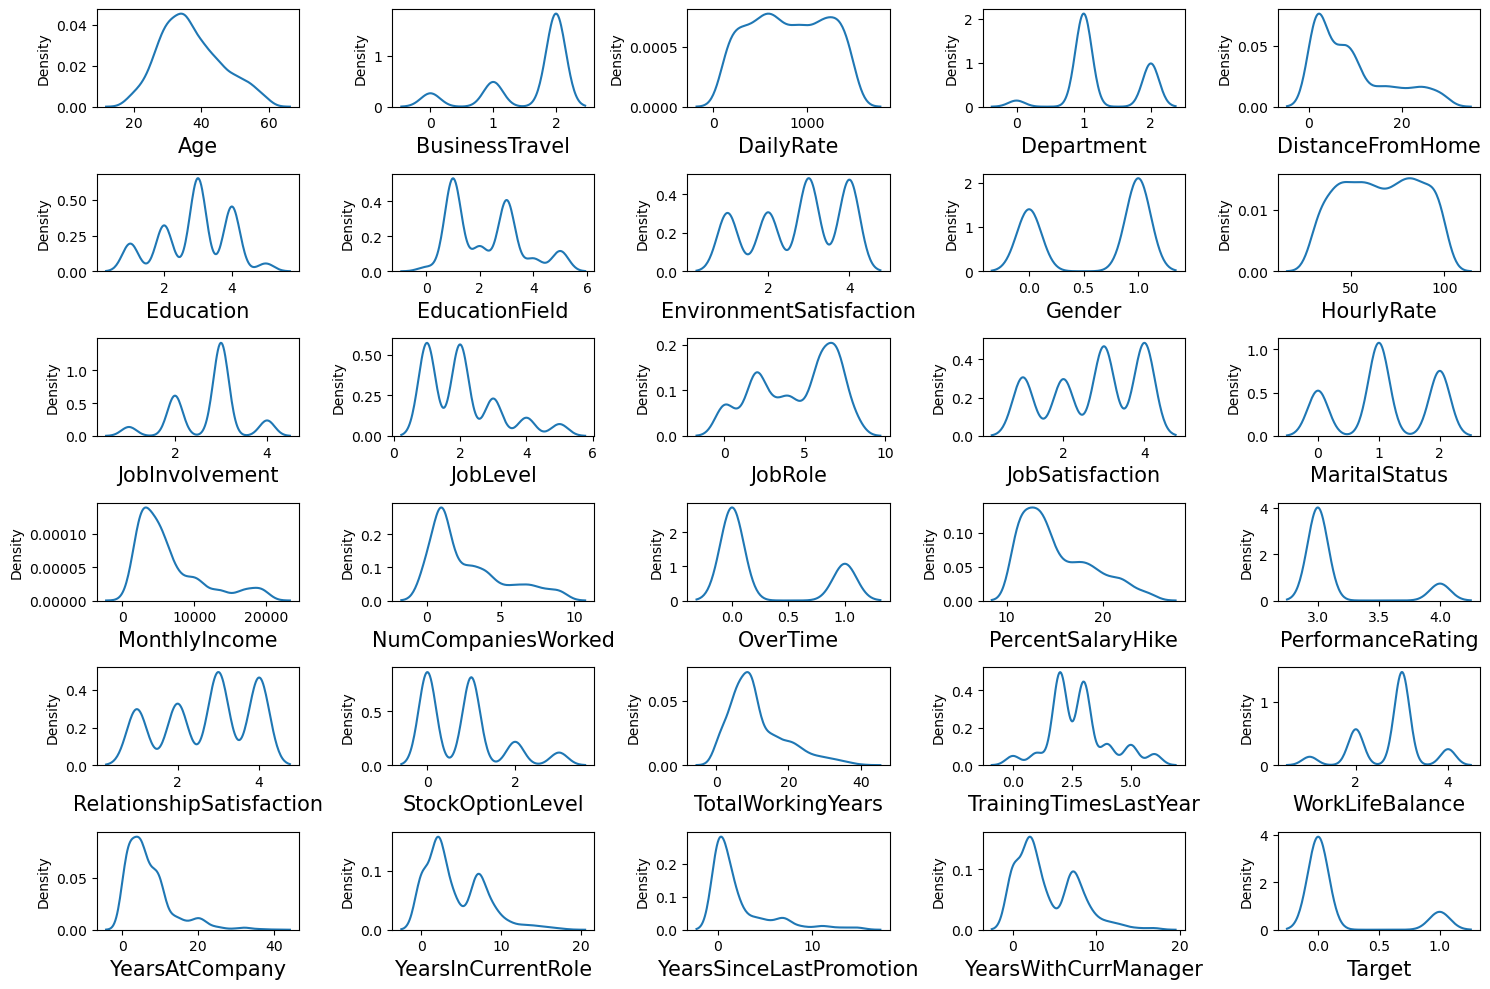

In [63]:
plt.figure(figsize=(15,10))
plt.title('Distplot Of HR Dataset')
plotnumber=1
for i in df.columns:
    if plotnumber<=35:
        ax=plt.subplot(6,5,plotnumber)
        sns.kdeplot(x=df[i])
        plt.xlabel(i, fontsize=15)
    plotnumber+=1
plt.tight_layout()

As we seen that mjor skewness is present in Monthly Income, Hourly Rate, OverTime and except other skewness are present but in less 
amount.

# Check outliers in dataset

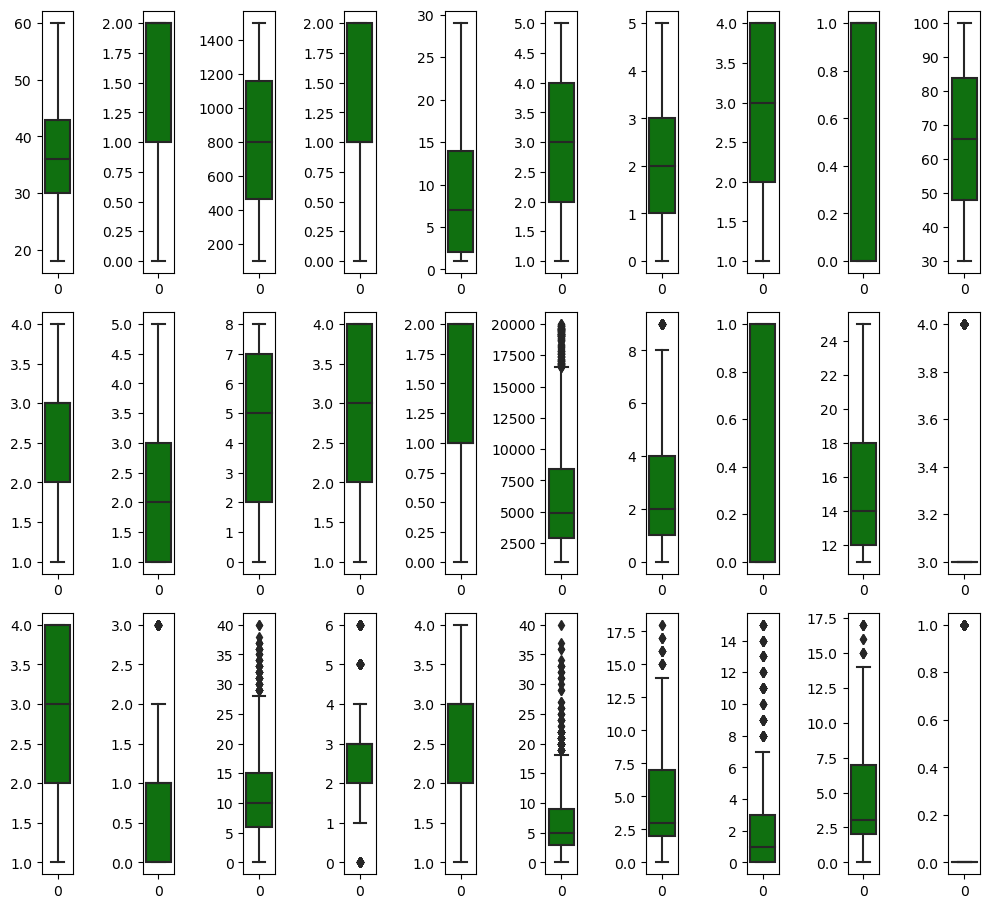

In [64]:
col=df.columns
ncol=10
nrow=10
plt.figure(figsize=(ncol,3*ncol))
for i in range(len(col)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(data=df[col[i]], orient='v', color='green')
    plt.tight_layout()

Major amount of outliers are present in years with current manager, Year since Last Promotion, Years in curent role, Years at company
Training time last years, Total working years, we resolve it during removing outliers.

# Check Correlation Of Dataset

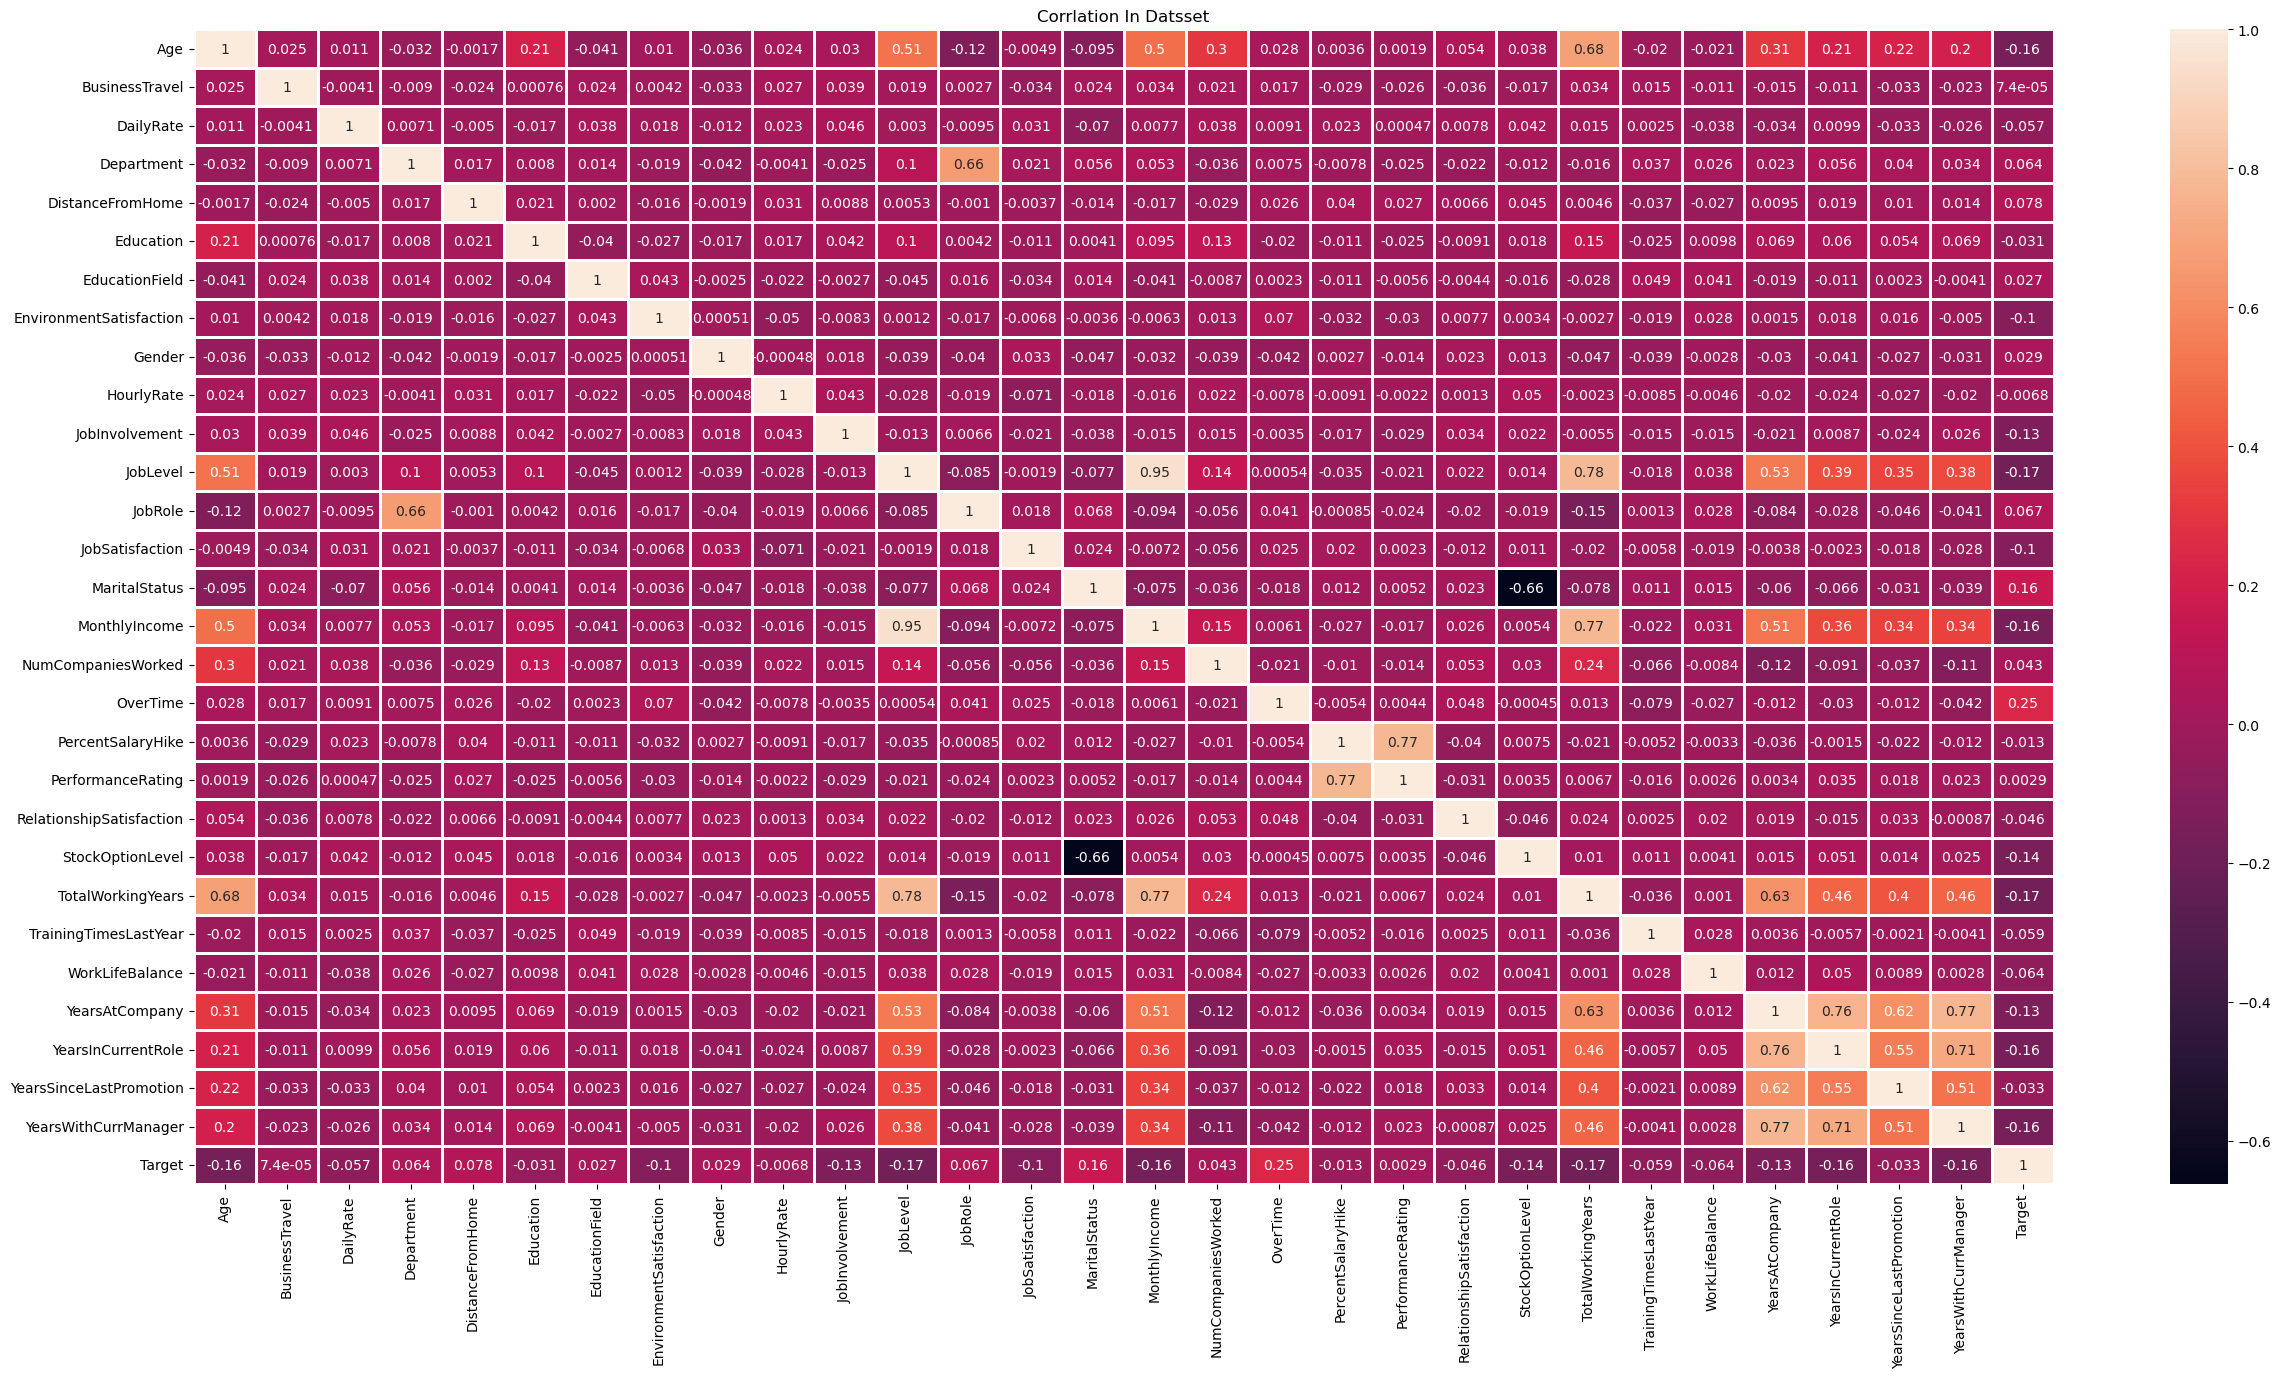

In [65]:
# correlation dataset with visulaization
plt.figure(figsize=(30,15))
sns.heatmap(df.corr(), annot=True, linewidth=1)
plt.title('Corrlation In Datsset')
plt.show()

1. Age variable is correlated with target with -16%. It look like good bond between them.
2. Business Travel variable is correlated with target with 0.00074%. It look like very very weak bond between them.
3. Daily Rate  variable is correlated with target with -5.7%. It look like good bond between them.
4. Department variable is correlated with target with 6.4%. It look like good bond between them.
5. Distance From Home variable is correlated with target with 7.8%. It look like  bond between them.
6. Education variable is correlated with target with -3.1%. It look like good bond between them.
7. Education Field variable is correlated with target with -2.7%. It look like good bond between them.
8. Environment Satisfication variable is correlated with target with -10%. It look like good bond between them.
9. Gender variable is correlated with target with 2.9%. It look like good bond between them.
10. Hourly Rate variable is correlated with target with -0.68%. It look like weak bond between them.
11. Job Involvement variable is correlated with target with -13%. It look like good bond between them.
12. Job level variable is correlated with target with -17%. It look like good bond between them.
13. Job Role variable is correlated with target with 6.7%. It look like good bond between them.
14. Job Satisfication variable is correlated with target with -10%. It look like good bond between them.
15. Marital Status variable is correlated with target with 16%. It look like good bond between them.
16. Monthly Income variable is correlated with target with -16%. It look like good bond between them.
17. Num Companies Worked variable is correlated with target with 4.3%. It look like good bond between them.
18. Over Time variable is correlated with target with 25%. It look like very good bond between them.
19. Percentage Salary Hike variable is correlated with target with -1.3%. It look like good bond between them.
20. Performance Rating variable is correlated with target with -0.29%. It look like weak bond between them.
21. Relationship Satisfication variable is correlated with target with -4.6%. It look like good bond between them.
22. Stock Optional Level variable is correlated with target with -14%. It look like good bond between them.
23. Total Working Years variable is correlated with target with -17%. It look like good bond between them.
24. Training Times Last Year variable is correlated with target with -5.9%. It look like good bond between them.
25. Work Life Balance variable is correlated with target with -6.4%. It look like good bond between them.
26. Years At Company variable is correlated with target with -13%. It look like good bond between them.
27. Years In Current Role variable is correlated with target with -16%. It look like good bond between them.
28. Years Since Last Promotion variable is correlated with target with -3.3%. It look like good bond between them.
29. Years With Current Manager variable is correlated with target with -16%. It look like good bond between them.

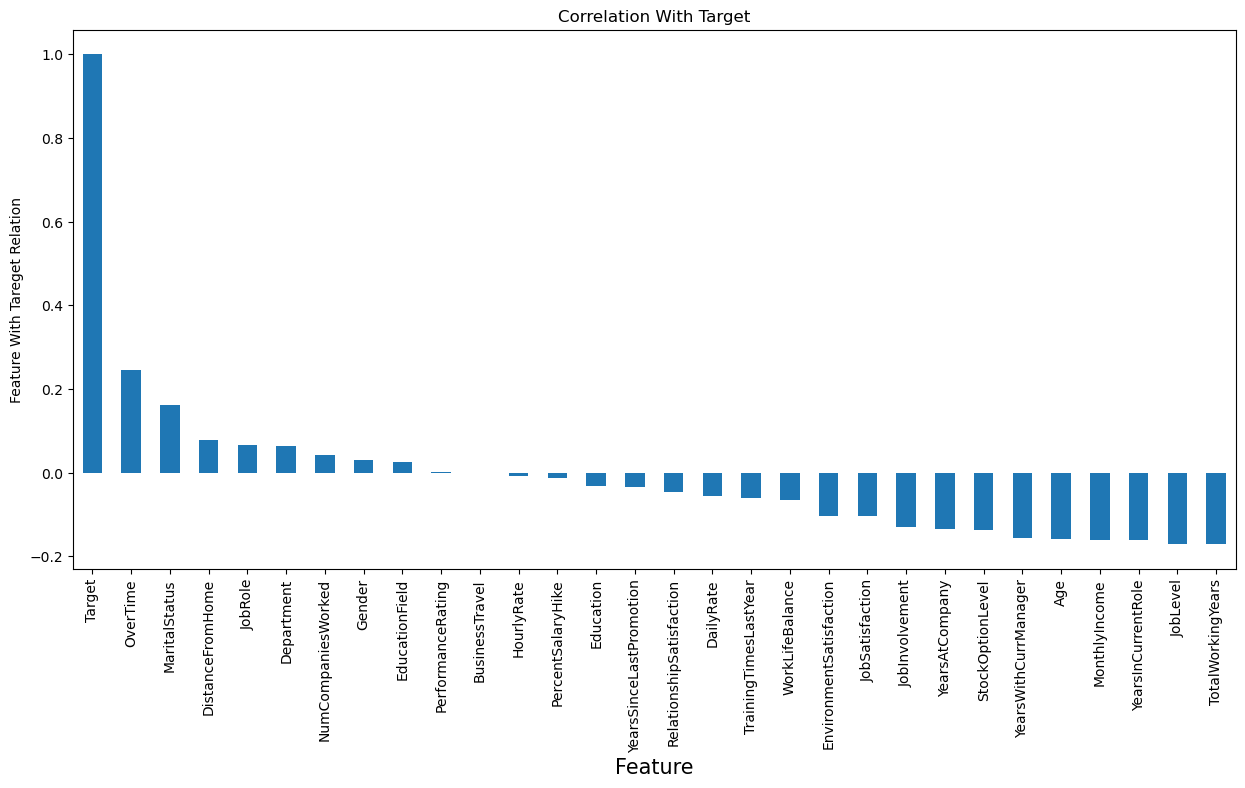

In [66]:
plt.figure(figsize=(15,7))
df.corr()['Target'].sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Feature With Tareget Relation')
plt.title('Correlation With Target')
plt.show()

As we seen that Performance Rating, Hourly Rate and Business Travel is not correlated in good manner with target columns. So i drop it 

In [67]:
# remove not correlated variable with target
df.drop(['PerformanceRating','BusinessTravel','HourlyRate'],axis=1,inplace=True)

As we know that any kind of prepocessing steps not apply on target and categorical column ,so we separted target, categorical and numerical variable

In [68]:
categorical

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [69]:
df1=df.drop(['Target','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime'],axis=1)  
#separated numerical variable column
df1.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,3,2,4,5993,8,11,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,2,2,2,5130,1,23,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,2,1,3,2090,6,15,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,3,1,3,2909,1,11,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,3,1,2,3468,9,12,4,1,6,3,3,2,2,2,2


In [70]:
df2=df.drop(['Age','DailyRate','DistanceFromHome','Education','EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction',
        'MonthlyIncome','NumCompaniesWorked','PercentSalaryHike','RelationshipSatisfaction','StockOptionLevel','TotalWorkingYears',
        'TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager'],axis=1)
df2.head()   #  categorical type datset

,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Target
0,2,1,0,7,2,1,1
1,1,1,1,6,1,0,0
2,1,4,1,2,2,1,1
3,1,1,0,6,1,1,0
4,1,3,1,2,1,0,0


# check outliers 

In [71]:
from scipy.stats import zscore

In [72]:
# check outliers in dataset
(zscore(df1)<3).all().all()

False

In [73]:
(zscore(df1)<3).all()

Age                          True
DailyRate                    True
DistanceFromHome             True
Education                    True
EnvironmentSatisfaction      True
JobInvolvement               True
JobLevel                     True
JobSatisfaction              True
MonthlyIncome                True
NumCompaniesWorked           True
PercentSalaryHike            True
RelationshipSatisfaction     True
StockOptionLevel             True
TotalWorkingYears           False
TrainingTimesLastYear        True
WorkLifeBalance              True
YearsAtCompany              False
YearsInCurrentRole          False
YearsSinceLastPromotion     False
YearsWithCurrManager        False
dtype: bool

Now we understand that outliers are present in 
1. TotalWorkingYears-->           False
2. YearsAtCompany-->              False
3. YearsInCurrentRole-->          False
4. YearsSinceLastPromotion-->     False
5. YearsWithCurrManager-->       False

# Now remove outliers By IQR METHOD

In [74]:
q1=df1.quantile(0.25)  #check at 25 % row
q3=df1.quantile(0.75)  #check at 75# row

In [75]:
# check at 50% data 
iqr=q3-q1

In [76]:
upper=q3+(1.5*iqr)
lower=q1-(1.5*iqr)
df1=df1[(df1>lower) & (df1<upper)]
df1 # remocve outliers

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,3,2,4,5993.0,8.0,11,1,0.0,8.0,NaN,1,6.0,4.0,0.0,5.0
1,49,279,8,1,3,2,2,2,5130.0,1.0,23,4,1.0,10.0,3.0,3,10.0,7.0,1.0,7.0
2,37,1373,2,2,4,2,1,3,2090.0,6.0,15,2,0.0,7.0,3.0,3,0.0,0.0,0.0,0.0
3,33,1392,3,4,4,3,1,3,2909.0,1.0,11,3,0.0,8.0,3.0,3,8.0,7.0,3.0,0.0
4,27,591,2,1,1,3,1,2,3468.0,NaN,12,4,1.0,6.0,3.0,3,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,4,2,4,2571.0,4.0,17,3,1.0,17.0,3.0,3,5.0,2.0,0.0,3.0
1466,39,613,6,1,4,2,3,1,9991.0,4.0,15,1,1.0,9.0,NaN,3,7.0,7.0,1.0,7.0
1467,27,155,4,3,2,4,2,2,6142.0,1.0,20,2,1.0,6.0,NaN,3,6.0,2.0,0.0,3.0
1468,49,1023,2,3,4,2,2,2,5390.0,2.0,14,4,0.0,17.0,3.0,2,9.0,6.0,0.0,8.0


In [77]:
# check shape after remove outliers by iqr method
df2.shape

(1470, 7)

no data loss during iqr method

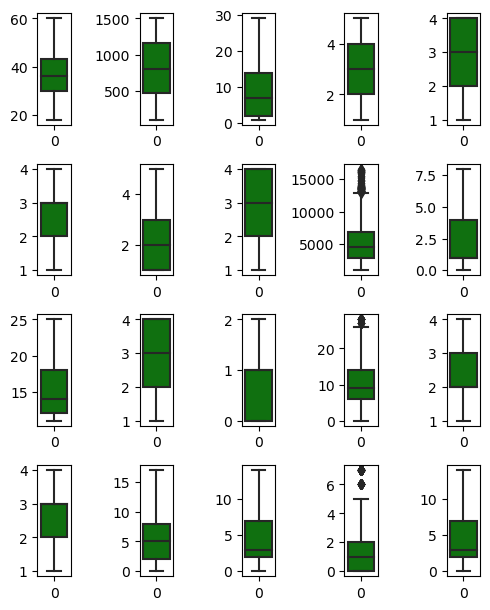

In [78]:
# Now check outliers by visulaization
col=df1.columns
ncol=5
nrow=10
plt.figure(figsize=(ncol,3*ncol))
for i in range(len(col)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(data=df1[col[i]], orient='v', color='green')
    plt.tight_layout()

After conclusion we find that comparision between zscore and iqr method , iqr methid give less outliers compare to zscore.
So we take df2 as for further process

In [79]:
# we see null values are presented in our dataset, so we remove it by the help of simple  imputer method
df1.isnull().sum().sum()

811

In [80]:
# remove null values by imputer method
imp=SimpleImputer(strategy='mean')
for i in df1.columns:
    df1[i]=imp.fit_transform(df1[i].values.reshape(-1,1))
df1.head()  # after remove null values

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,1102.0,1.0,2.0,2.0,3.0,2.0,4.0,5993.0,8.000000,11.0,1.0,0.0,8.0,2.540584,1.0,6.0,4.0,0.0,5.0
1,49.0,279.0,8.0,1.0,3.0,2.0,2.0,2.0,5130.0,1.000000,23.0,4.0,1.0,10.0,3.000000,3.0,10.0,7.0,1.0,7.0
2,37.0,1373.0,2.0,2.0,4.0,2.0,1.0,3.0,2090.0,6.000000,15.0,2.0,0.0,7.0,3.000000,3.0,0.0,0.0,0.0,0.0
3,33.0,1392.0,3.0,4.0,4.0,3.0,1.0,3.0,2909.0,1.000000,11.0,3.0,0.0,8.0,3.000000,3.0,8.0,7.0,3.0,0.0
4,27.0,591.0,2.0,1.0,1.0,3.0,1.0,2.0,3468.0,2.461918,12.0,4.0,1.0,6.0,3.000000,3.0,2.0,2.0,2.0,2.0


In [81]:
# check null values
df1.isnull().sum().any()

False

No null values are present in our numerical datset 

# Check Skewness

In [82]:
df1.skew()  #check skewness

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.243477
NumCompaniesWorked          0.999006
PercentSalaryHike           0.821128
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.549500
TotalWorkingYears           0.800070
TrainingTimesLastYear       0.176189
WorkLifeBalance            -0.552480
YearsAtCompany              0.703993
YearsInCurrentRole          0.688917
YearsSinceLastPromotion     1.617821
YearsWithCurrManager        0.653669
dtype: float64

If we take threshold=0.30, then skewness is
1. DistanceFromHome            0.958118
2. Age                         0.413286
3. EnvironmentSatisfaction    -0.321654
4. JobInvolvement             -0.498419
5. JobLevel                    1.025401
6. JobSatisfaction            -0.329672
7. MonthlyIncome               1.243477
8. NumCompaniesWorked          0.999006
9. PercentSalaryHike           0.821128
10. RelationshipSatisfaction   -0.302828
11. StockOptionLevel            0.549500
12. TotalWorkingYears           0.800070
13. WorkLifeBalance            -0.552480
14. YearsAtCompany              0.703993
15. YearsInCurrentRole          0.688917
16. YearsSinceLastPromotion     1.617821
17. YearsWithCurrManager        0.653669

# Remove skewness --> POWER METHOD

In [83]:
# remove skewness by power method
df3=power_transform(df1)
type(df3)  #we put into other variable

numpy.ndarray

In [87]:
# first  of all we convert numpy array into frame
df4=pd.DataFrame(data=df3,columns=df1.columns)
df4

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.522140,0.759289,-1.494085,-0.916940,-0.706596,0.326033,0.241622,1.192743,0.444034,1.807701,-1.488918,-1.529513,-1.095611,-0.221205,0.025012,-2.144446,0.265452,0.223489,-1.117315,0.511437
1,1.276411,-1.334597,0.243416,-1.771185,0.208597,-1.058710,0.241622,-0.709062,0.166325,-0.558895,1.679689,1.229016,0.693785,0.112719,0.681270,0.276821,1.147560,0.944376,0.204123,0.950351
2,0.102091,1.340365,-1.031215,-0.916940,1.209516,-1.058710,-1.170135,0.197856,-1.485805,1.419136,0.201133,-0.700130,-1.095611,-0.404183,0.681270,0.276821,-2.117650,-1.594403,-1.117315,-1.548694
3,-0.353971,1.379936,-0.700347,1.082871,1.209516,0.326033,-1.170135,0.197856,-0.867743,-0.558895,-1.488918,0.225164,-1.095611,-0.221205,0.681270,0.276821,0.735721,0.944376,1.121119,-1.548694
4,-1.123755,-0.453941,-1.031215,-1.771185,-1.518118,0.326033,-1.170135,-0.709062,-0.543821,0.315928,-0.948760,1.229016,0.693785,-0.600712,0.681270,0.276821,-1.006520,-0.451939,0.780674,-0.410708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.008279,0.264672,1.407126,-0.916940,0.208597,2.014107,0.241622,1.192743,-1.097284,0.894628,0.719724,0.225164,0.693785,1.065521,0.681270,0.276821,0.000048,-0.451939,-1.117315,-0.049727
1466,0.316210,-0.397219,-0.050827,-1.771185,1.209516,-1.058710,1.009822,-1.509980,1.339936,0.894628,0.201133,-1.529513,0.693785,-0.049479,0.025012,0.276821,0.509291,0.944376,0.204123,0.950351
1467,-1.123755,-1.751713,-0.442291,0.040522,-0.706596,2.014107,0.241622,-0.709062,0.487675,-0.558895,1.281630,-0.700130,0.693785,-0.600712,0.025012,0.276821,0.265452,-0.451939,-1.117315,-0.049727
1468,1.276411,0.583235,-1.031215,0.040522,1.209516,-1.058710,0.241622,-0.709062,0.254891,0.088877,-0.121307,1.229016,-1.095611,1.065521,0.681270,-1.108624,0.947733,0.729025,-1.117315,1.140582


In [88]:
# Now check skewness after apply power method
df4.skew()

Age                        -0.007603
DailyRate                  -0.196160
DistanceFromHome           -0.007468
Education                  -0.099881
EnvironmentSatisfaction    -0.205395
JobInvolvement             -0.020365
JobLevel                    0.103624
JobSatisfaction            -0.212815
MonthlyIncome               0.005486
NumCompaniesWorked          0.004891
PercentSalaryHike           0.116250
RelationshipSatisfaction   -0.193634
StockOptionLevel            0.039199
TotalWorkingYears          -0.022506
TrainingTimesLastYear       0.011110
WorkLifeBalance            -0.012286
YearsAtCompany             -0.055228
YearsInCurrentRole         -0.077788
YearsSinceLastPromotion     0.152057
YearsWithCurrManager       -0.080668
dtype: float64

AS we see that after apply power method all values are comes under threshold values 0.30

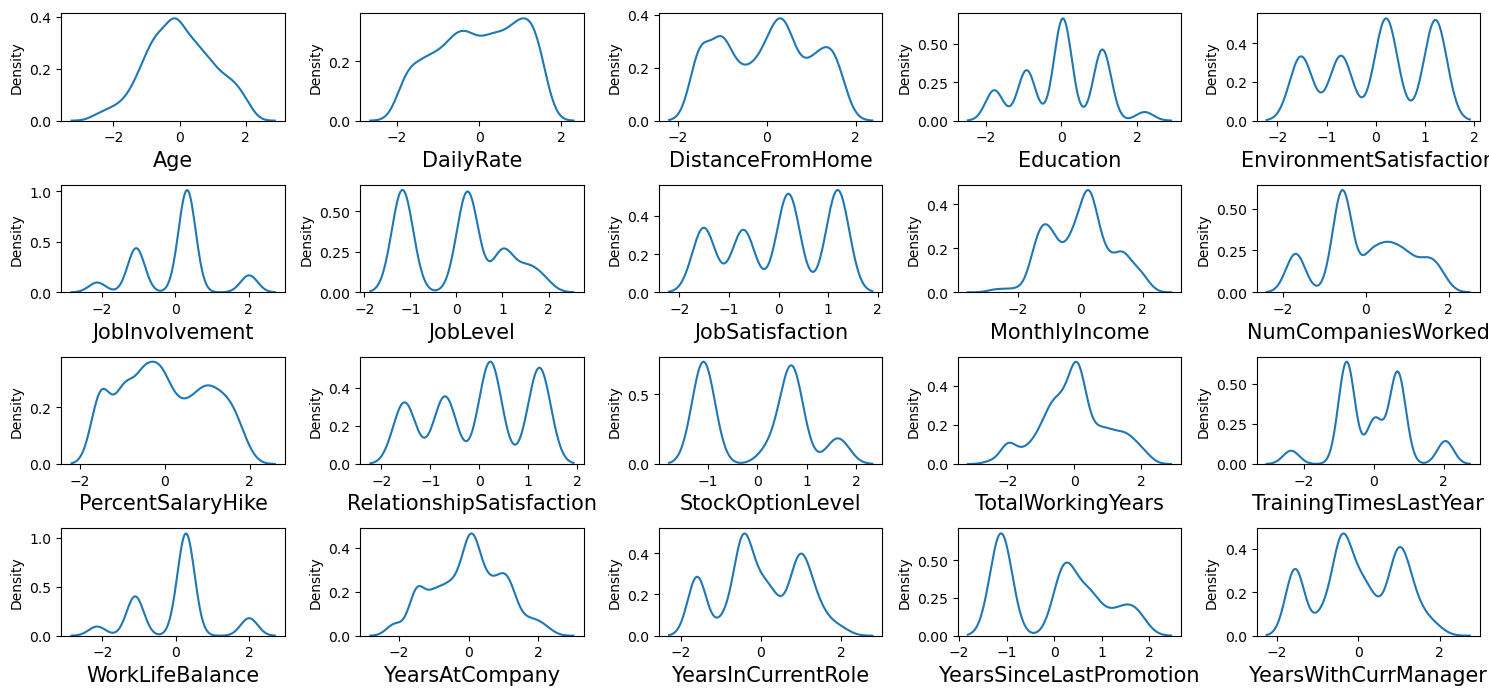

In [89]:
# now we see it by visulaization technique
plt.figure(figsize=(15,10))
plt.title('Distplot Of HR Dataset')
plotnumber=1
for i in df4.columns:
    if plotnumber<=35:
        ax=plt.subplot(6,5,plotnumber)
        sns.kdeplot(x=df4[i])
        plt.xlabel(i, fontsize=15)
    plotnumber+=1
plt.tight_layout()

By in daily rate, job satisfication,Percent Salary Hike,Relationship Satisfaction,YearsSinceLastPromotion some skewness are present 
so we try to reduce once again by power method.

In [90]:
# remove skewness by power method
df1=power_transform(df4)
type(df1)  #we put into other variable

numpy.ndarray

In [91]:
# first  of all we convert numpy array into frame
df1=pd.DataFrame(data=df1,columns=df4.columns)
df1

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.525276,0.741049,-1.484085,-0.920702,-0.748720,0.304422,0.253208,1.247765,0.443723,1.790090,-1.543986,-1.452868,-1.093006,-0.221715,0.030505,-2.074678,0.248678,0.206479,-1.131275,0.497590
1,1.273255,-1.296373,0.235213,-1.714680,0.131368,-1.053114,0.253208,-0.753400,0.165931,-0.553347,1.616689,1.282738,0.688160,0.112185,0.683798,0.256932,1.155501,0.944468,0.239402,0.950667
2,0.106709,1.403868,-1.030258,-0.920702,1.264629,-1.053114,-1.175834,0.116122,-1.485319,1.410534,0.242152,-0.739382,-1.093006,-0.404616,0.683798,0.256932,-2.064098,-1.569949,-1.131275,-1.523759
3,-0.350026,1.450174,-0.704339,1.092874,1.264629,0.304422,-1.175834,0.116122,-0.867806,-0.553347,-1.543986,0.154425,-1.093006,-0.221715,0.683798,0.256932,0.729066,0.944468,1.114457,-1.523759
4,-1.125352,-0.505259,-1.030258,-1.714680,-1.438913,0.304422,-1.175834,-0.753400,-0.544083,0.323637,-0.949953,1.282738,0.688160,-0.601022,0.683798,0.256932,-1.005311,-0.466038,0.795112,-0.427448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.003595,0.206664,1.415513,-0.920702,0.131368,2.086069,0.253208,1.247765,-1.097168,0.895759,0.739323,0.154425,0.688160,1.065653,0.683798,0.256932,-0.018516,-0.466038,-1.131275,-0.070372
1466,0.320294,-0.451764,-0.059665,-1.714680,1.264629,-1.053114,1.009635,-1.429404,1.340267,0.895759,0.242152,-1.452868,0.688160,-0.050021,0.030505,0.256932,0.496783,0.944468,0.239402,0.950667
1467,-1.125352,-1.651355,-0.449085,0.009405,-0.748720,2.086069,0.253208,-0.753400,0.487383,-0.553347,1.258313,-0.739382,0.688160,-0.601022,0.030505,0.256932,0.248678,-0.466038,-1.131275,-0.070372
1468,1.273255,0.547308,-1.030258,0.009405,1.264629,-1.053114,0.253208,-0.753400,0.254516,0.097599,-0.079434,1.282738,-1.093006,1.065653,0.683798,-1.101017,0.948002,0.722263,-1.131275,1.148935


In [92]:
df1.skew()  # again check skewness after apply power method once more time

Age                        -0.027493
DailyRate                  -0.042388
DistanceFromHome            0.012294
Education                   0.022208
EnvironmentSatisfaction    -0.043240
JobInvolvement              0.125397
JobLevel                    0.077894
JobSatisfaction            -0.048623
MonthlyIncome               0.007116
NumCompaniesWorked         -0.023685
PercentSalaryHike           0.011717
RelationshipSatisfaction   -0.037733
StockOptionLevel            0.054357
TotalWorkingYears          -0.019827
TrainingTimesLastYear      -0.020499
WorkLifeBalance             0.122863
YearsAtCompany              0.018255
YearsInCurrentRole         -0.024695
YearsSinceLastPromotion     0.086921
YearsWithCurrManager       -0.025790
dtype: float64

Now we reduces once again our skewness values for make better, so we next perform other task.

In [93]:
# combinesd both dataset 
# Merge both numerical and object type data
df=pd.concat([df1,df2],axis=1)
df

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Target
0,0.525276,0.741049,-1.484085,-0.920702,-0.748720,0.304422,0.253208,1.247765,0.443723,1.790090,-1.543986,-1.452868,-1.093006,-0.221715,0.030505,-2.074678,0.248678,0.206479,-1.131275,0.497590,2,1,0,7,2,1,1
1,1.273255,-1.296373,0.235213,-1.714680,0.131368,-1.053114,0.253208,-0.753400,0.165931,-0.553347,1.616689,1.282738,0.688160,0.112185,0.683798,0.256932,1.155501,0.944468,0.239402,0.950667,1,1,1,6,1,0,0
2,0.106709,1.403868,-1.030258,-0.920702,1.264629,-1.053114,-1.175834,0.116122,-1.485319,1.410534,0.242152,-0.739382,-1.093006,-0.404616,0.683798,0.256932,-2.064098,-1.569949,-1.131275,-1.523759,1,4,1,2,2,1,1
3,-0.350026,1.450174,-0.704339,1.092874,1.264629,0.304422,-1.175834,0.116122,-0.867806,-0.553347,-1.543986,0.154425,-1.093006,-0.221715,0.683798,0.256932,0.729066,0.944468,1.114457,-1.523759,1,1,0,6,1,1,0
4,-1.125352,-0.505259,-1.030258,-1.714680,-1.438913,0.304422,-1.175834,-0.753400,-0.544083,0.323637,-0.949953,1.282738,0.688160,-0.601022,0.683798,0.256932,-1.005311,-0.466038,0.795112,-0.427448,1,3,1,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.003595,0.206664,1.415513,-0.920702,0.131368,2.086069,0.253208,1.247765,-1.097168,0.895759,0.739323,0.154425,0.688160,1.065653,0.683798,0.256932,-0.018516,-0.466038,-1.131275,-0.070372,1,3,1,2,1,0,0
1466,0.320294,-0.451764,-0.059665,-1.714680,1.264629,-1.053114,1.009635,-1.429404,1.340267,0.895759,0.242152,-1.452868,0.688160,-0.050021,0.030505,0.256932,0.496783,0.944468,0.239402,0.950667,1,3,1,0,1,0,0
1467,-1.125352,-1.651355,-0.449085,0.009405,-0.748720,2.086069,0.253208,-0.753400,0.487383,-0.553347,1.258313,-0.739382,0.688160,-0.601022,0.030505,0.256932,0.248678,-0.466038,-1.131275,-0.070372,1,1,1,4,1,1,0
1468,1.273255,0.547308,-1.030258,0.009405,1.264629,-1.053114,0.253208,-0.753400,0.254516,0.097599,-0.079434,1.282738,-1.093006,1.065653,0.683798,-1.101017,0.948002,0.722263,-1.131275,1.148935,2,3,1,7,1,0,0


# Check Multicolonility in dataset

In [94]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [95]:
def calc_vif(df):
    vif=pd.DataFrame()
    vif['Variable']=df.columns
    vif['VIF Factor']=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    return[vif]

In [96]:
# check multicolinilty
calc_vif(df)

[                    Variable  VIF Factor
 0                        Age    1.795770
 1                  DailyRate    1.021525
 2           DistanceFromHome    1.018062
 3                  Education    1.070000
 4    EnvironmentSatisfaction    1.040215
 5             JobInvolvement    1.034037
 6                   JobLevel    3.773097
 7            JobSatisfaction    1.031425
 8              MonthlyIncome    3.183911
 9         NumCompaniesWorked    1.341094
 10         PercentSalaryHike    1.015221
 11  RelationshipSatisfaction    1.025944
 12          StockOptionLevel    1.858584
 13         TotalWorkingYears    2.948106
 14     TrainingTimesLastYear    1.015704
 15           WorkLifeBalance    1.018273
 16            YearsAtCompany    4.154420
 17        YearsInCurrentRole    3.388352
 18   YearsSinceLastPromotion    1.323227
 19      YearsWithCurrManager    2.905615
 20                Department   11.652605
 21            EducationField    3.276141
 22                    Gender    2

In [97]:
# Here vif vlaues comes highest in Department so we drop it
df.drop(['Department'],axis=1,inplace=True)

In [98]:
# once again check multicolinity
calc_vif(df)

[                    Variable  VIF Factor
 0                        Age    1.795727
 1                  DailyRate    1.020060
 2           DistanceFromHome    1.018055
 3                  Education    1.069144
 4    EnvironmentSatisfaction    1.040002
 5             JobInvolvement    1.033815
 6                   JobLevel    3.687204
 7            JobSatisfaction    1.031406
 8              MonthlyIncome    3.155200
 9         NumCompaniesWorked    1.340692
 10         PercentSalaryHike    1.015022
 11  RelationshipSatisfaction    1.025944
 12          StockOptionLevel    1.764990
 13         TotalWorkingYears    2.936814
 14     TrainingTimesLastYear    1.015216
 15           WorkLifeBalance    1.018178
 16            YearsAtCompany    4.152648
 17        YearsInCurrentRole    3.388060
 18   YearsSinceLastPromotion    1.321252
 19      YearsWithCurrManager    2.903116
 20            EducationField    3.140210
 21                    Gender    2.161472
 22                   JobRole    3

Now no major values not comes so we understand that no multicolinity is not present.

# Save dataset

In [100]:
# After this we going to forword for other steps we save our data
df.to_csv('HR_Target.csv')

# Import Save daatset

In [6]:
# import our save data
df=pd.read_csv('HR_Target.csv')
df

,Unnamed: 0,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,EducationField,Gender,JobRole,MaritalStatus,OverTime,Target
0,0,0.525276,0.741049,-1.484085,-0.920702,-0.748720,0.304422,0.253208,1.247765,0.443723,...,0.248678,0.206479,-1.131275,0.497590,1,0,7,2,1,1
1,1,1.273255,-1.296373,0.235213,-1.714680,0.131368,-1.053114,0.253208,-0.753400,0.165931,...,1.155501,0.944468,0.239402,0.950667,1,1,6,1,0,0
2,2,0.106709,1.403868,-1.030258,-0.920702,1.264629,-1.053114,-1.175834,0.116122,-1.485319,...,-2.064098,-1.569949,-1.131275,-1.523759,4,1,2,2,1,1
3,3,-0.350026,1.450174,-0.704339,1.092874,1.264629,0.304422,-1.175834,0.116122,-0.867806,...,0.729066,0.944468,1.114457,-1.523759,1,0,6,1,1,0
4,4,-1.125352,-0.505259,-1.030258,-1.714680,-1.438913,0.304422,-1.175834,-0.753400,-0.544083,...,-1.005311,-0.466038,0.795112,-0.427448,3,1,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1465,-0.003595,0.206664,1.415513,-0.920702,0.131368,2.086069,0.253208,1.247765,-1.097168,...,-0.018516,-0.466038,-1.131275,-0.070372,3,1,2,1,0,0
1466,1466,0.320294,-0.451764,-0.059665,-1.714680,1.264629,-1.053114,1.009635,-1.429404,1.340267,...,0.496783,0.944468,0.239402,0.950667,3,1,0,1,0,0
1467,1467,-1.125352,-1.651355,-0.449085,0.009405,-0.748720,2.086069,0.253208,-0.753400,0.487383,...,0.248678,-0.466038,-1.131275,-0.070372,1,1,4,1,1,0
1468,1468,1.273255,0.547308,-1.030258,0.009405,1.264629,-1.053114,0.253208,-0.753400,0.254516,...,0.948002,0.722263,-1.131275,1.148935,3,1,7,1,0,0


In [7]:
# it crearte unnecessary columns so we drop it
df.drop(['Unnamed: 0'],axis=1, inplace =True)

# split in independent and dependent variable

In [8]:
x=df.drop(['Target'],axis=1)   #independent variable

In [9]:
y= df['Target']   # dependent variable

In [10]:
y.value_counts()  #check target values

0    1233
1     237
Name: Target, dtype: int64

imbaalance found in this so we apply smote method 

# SMOTE METHOD

In [11]:
from imblearn.over_sampling import SMOTE

In [12]:
# apply smote method for balancibg target
sm=SMOTE()
x,y=sm.fit_resample(x,y)

In [13]:
y.value_counts()

1    1233
0    1233
Name: Target, dtype: int64

now we balances our target value

# Apply standard scaler on independent variable

In [14]:
# apply min max scaler
st=MinMaxScaler()
x=st.fit_transform(x)
x

array([[0.65593778, 0.72548452, 0.        , ..., 0.875     , 1.        ,
        1.        ],
       [0.81356439, 0.1485324 , 0.54169593, ..., 0.75      , 0.5       ,
        0.        ],
       [0.56773046, 0.91317978, 0.14298635, ..., 0.25      , 1.        ,
        1.        ],
       ...,
       [0.49388387, 0.54350506, 0.87395305, ..., 0.75      , 0.5       ,
        1.        ],
       [0.42166853, 0.30575435, 0.04508452, ..., 0.25      , 1.        ,
        0.        ],
       [0.62558431, 0.45207352, 0.60080544, ..., 0.875     , 0.5       ,
        0.        ]])

In [15]:
x=pd.DataFrame(x)

In [16]:
y=pd.DataFrame(y)

# Model Process

In [17]:
# Creating instances for different Classifiers
LO= LogisticRegression()
GA= GaussianNB()
MU= MultinomialNB()
BA= BernoulliNB()
KN= KNeighborsClassifier()
SV= SVC()
DT= DecisionTreeClassifier()
AD= AdaBoostClassifier()
GR= GradientBoostingClassifier()
RF= RandomForestClassifier()
XG= xgb.XGBClassifier(objective="reg:linear", random_state=42)

# Creating a list model where all the models will be appended for further evaluation in loop.
models=[]
models.append(('LogisticRegression',LO))
models.append(('MultinomialNB',MU))
models.append(('GaussianNB',GA))
models.append(('Bernoulli',BA))
models.append(('DecisionTreeClassifier',DT))
models.append(('KneighborsClassifier',KN))
models.append(('AdaBoostClassifier',AD))
models.append(('GradientBoostingClassifier',GR))
models.append(('RandomForestClassifier',RF))
models.append(('XGBClassifier',XG))

****************************** LogisticRegression ******************************
The maximum accuracy score of LogisticRegression is 0.7852077001013171 is achieved at 29




Accuracy_Score:  75.6838905775076


Accuracy Score of Model  : 76.47058823529412


AUC_Score: 75.68386561660823


Cross Validation Score:  75.91355905757528


Precision Score: 75.7085020242915


Recall_Score:  75.7085020242915


Balanced Accuracy_Score:  75.68386561660823


F1 Score:  75.7085020242915


Confusion matrix: 

[[373 120]
 [120 374]]


Classification Report:
 
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       493
           1       0.76      0.76      0.76       494

    accuracy                           0.76       987
   macro avg       0.76      0.76      0.76       987
weighted avg       0.76      0.76      0.76       987



<Figure size 500x500 with 0 Axes>

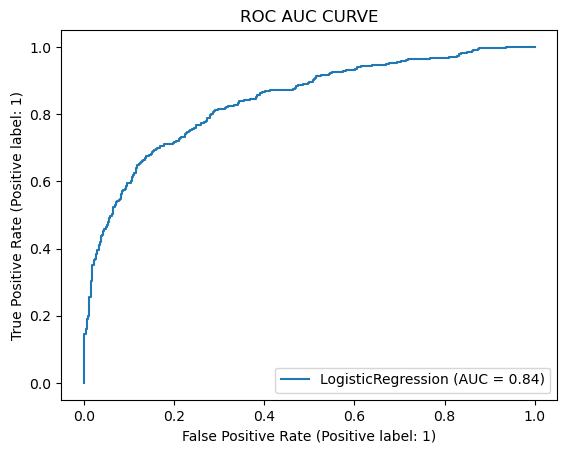





****************************** MultinomialNB ******************************
The maximum accuracy score of MultinomialNB is 0.713272543059777 is achieved at 39




Accuracy_Score:  71.3272543059777


Accuracy Score of Model  : 68.69506423258959


AUC_Score: 71.32814873820533


Cross Validation Score:  69.38244738073925


Precision Score: 71.75257731958763


Recall_Score:  70.44534412955466


Balanced Accuracy_Score:  71.32814873820533


F1 Score:  71.0929519918284


Confusion matrix: 

[[356 137]
 [146 348]]


Classification Report:
 
              precision    recall  f1-score   support

           0       0.71      0.72      0.72       493
           1       0.72      0.70      0.71       494

    accuracy                           0.71       987
   macro avg       0.71      0.71      0.71       987
weighted avg       0.71      0.71      0.71       987



<Figure size 500x500 with 0 Axes>

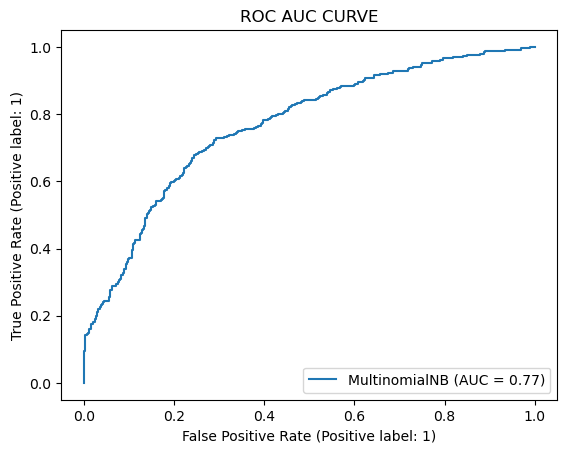





****************************** GaussianNB ******************************
The maximum accuracy score of GaussianNB is 0.7396149949341438 is achieved at 37




Accuracy_Score:  70.51671732522796


Accuracy Score of Model  : 70.25016903313049


AUC_Score: 70.51822683561768


Cross Validation Score:  70.47950661487545


Precision Score: 71.18997912317327


Recall_Score:  69.02834008097166


Balanced Accuracy_Score:  70.51822683561768


F1 Score:  70.09249743062692


Confusion matrix: 

[[355 138]
 [153 341]]


Classification Report:
 
              precision    recall  f1-score   support

           0       0.70      0.72      0.71       493
           1       0.71      0.69      0.70       494

    accuracy                           0.71       987
   macro avg       0.71      0.71      0.71       987
weighted avg       0.71      0.71      0.71       987



<Figure size 500x500 with 0 Axes>

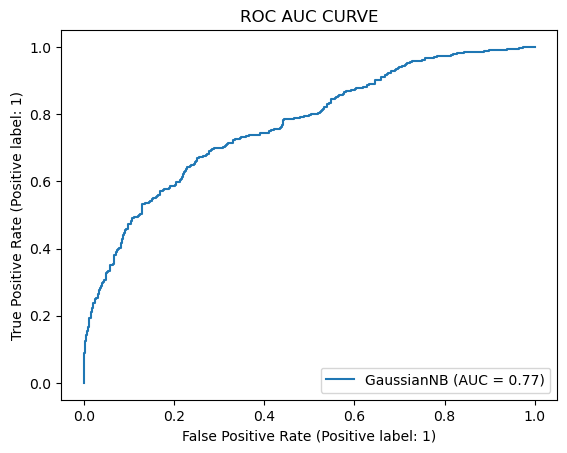





****************************** Bernoulli ******************************
The maximum accuracy score of Bernoulli is 0.7082066869300911 is achieved at 37




Accuracy_Score:  70.01013171225937


Accuracy Score of Model  : 65.44962812711292


AUC_Score: 70.0103062305475


Cross Validation Score:  66.50811769633164


Precision Score: 70.1219512195122


Recall_Score:  69.83805668016194


Balanced Accuracy_Score:  70.0103062305475


F1 Score:  69.97971602434076


Confusion matrix: 

[[346 147]
 [149 345]]


Classification Report:
 
              precision    recall  f1-score   support

           0       0.70      0.70      0.70       493
           1       0.70      0.70      0.70       494

    accuracy                           0.70       987
   macro avg       0.70      0.70      0.70       987
weighted avg       0.70      0.70      0.70       987



<Figure size 500x500 with 0 Axes>

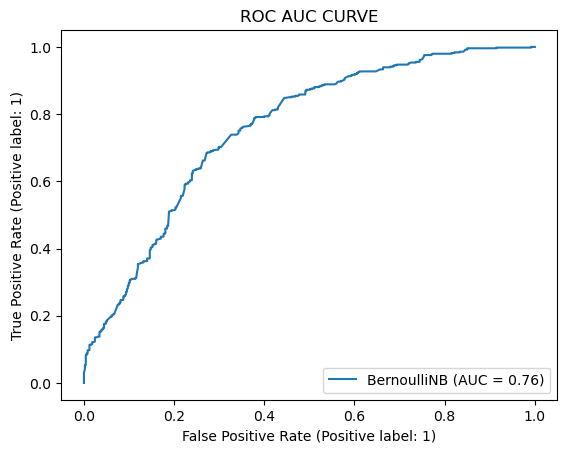





****************************** DecisionTreeClassifier ******************************
The maximum accuracy score of DecisionTreeClassifier is 0.8520770010131712 is achieved at 29




Accuracy_Score:  81.96555217831813


Accuracy Score of Model  : 100.0


AUC_Score: 81.96512305885636


Cross Validation Score:  83.33905445467312


Precision Score: 81.72690763052208


Recall_Score:  82.38866396761134


Balanced Accuracy_Score:  81.96512305885636


F1 Score:  82.05645161290323


Confusion matrix: 

[[402  91]
 [ 87 407]]


Classification Report:
 
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       493
           1       0.82      0.82      0.82       494

    accuracy                           0.82       987
   macro avg       0.82      0.82      0.82       987
weighted avg       0.82      0.82      0.82       987



<Figure size 500x500 with 0 Axes>

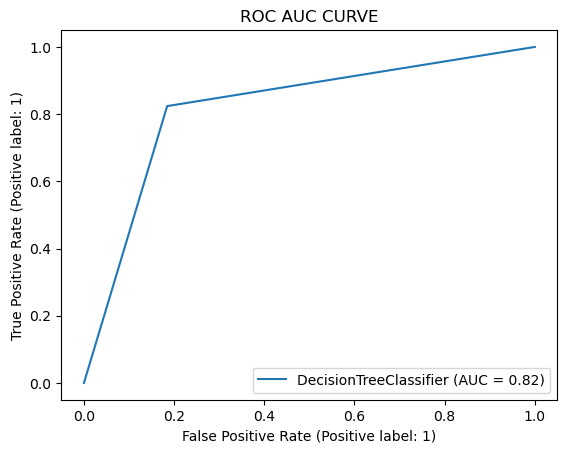





****************************** KneighborsClassifier ******************************
The maximum accuracy score of KneighborsClassifier is 0.7892603850050659 is achieved at 37




Accuracy_Score:  76.49442755825734


Accuracy Score of Model  : 84.98985801217039


AUC_Score: 76.47469430324132


Cross Validation Score:  78.42819718980711


Precision Score: 69.09620991253644


Recall_Score:  95.95141700404858


Balanced Accuracy_Score:  76.47469430324132


F1 Score:  80.33898305084745


Confusion matrix: 

[[281 212]
 [ 20 474]]


Classification Report:
 
              precision    recall  f1-score   support

           0       0.93      0.57      0.71       493
           1       0.69      0.96      0.80       494

    accuracy                           0.76       987
   macro avg       0.81      0.76      0.76       987
weighted avg       0.81      0.76      0.76       987



<Figure size 500x500 with 0 Axes>

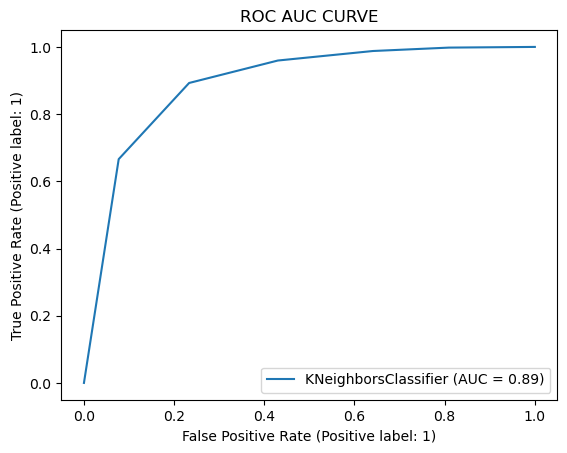





****************************** AdaBoostClassifier ******************************
The maximum accuracy score of AdaBoostClassifier is 0.8885511651469098 is achieved at 25




Accuracy_Score:  87.33535967578521


Accuracy Score of Model  : 89.04665314401623


AUC_Score: 87.33442281002867


Cross Validation Score:  84.39776301418236


Precision Score: 86.67992047713717


Recall_Score:  88.25910931174089


Balanced Accuracy_Score:  87.33442281002866


F1 Score:  87.46238716148444


Confusion matrix: 

[[426  67]
 [ 58 436]]


Classification Report:
 
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       493
           1       0.87      0.88      0.87       494

    accuracy                           0.87       987
   macro avg       0.87      0.87      0.87       987
weighted avg       0.87      0.87      0.87       987



<Figure size 500x500 with 0 Axes>

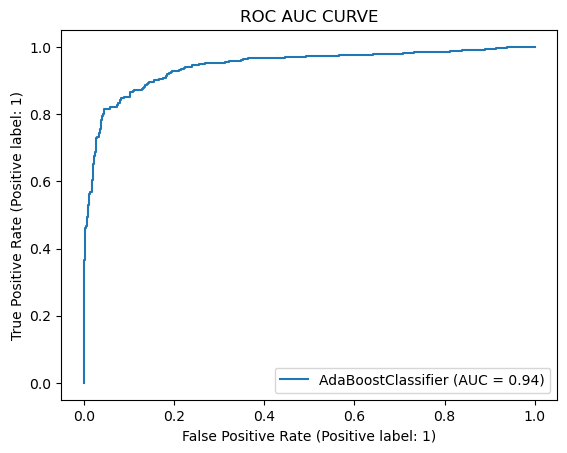





****************************** GradientBoostingClassifier ******************************
The maximum accuracy score of GradientBoostingClassifier is 0.9290780141843972 is achieved at 39




Accuracy_Score:  92.90780141843972


Accuracy Score of Model  : 96.41649763353617


AUC_Score: 92.91148959932988


Cross Validation Score:  88.05068530274039


Precision Score: 96.2882096069869


Recall_Score:  89.27125506072875


Balanced Accuracy_Score:  92.91148959932988


F1 Score:  92.64705882352942


Confusion matrix: 

[[476  17]
 [ 53 441]]


Classification Report:
 
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       493
           1       0.96      0.89      0.93       494

    accuracy                           0.93       987
   macro avg       0.93      0.93      0.93       987
weighted avg       0.93      0.93      0.93       987



<Figure size 500x500 with 0 Axes>

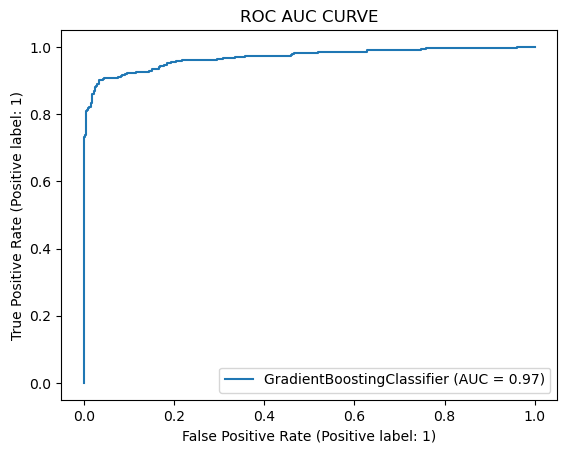





****************************** RandomForestClassifier ******************************
The maximum accuracy score of RandomForestClassifier is 0.9371833839918946 is achieved at 27




Accuracy_Score:  93.21175278622087


Accuracy Score of Model  : 100.0


AUC_Score: 93.21390150364208


Cross Validation Score:  92.46388713240428


Precision Score: 95.13742071881607


Recall_Score:  91.09311740890689


Balanced Accuracy_Score:  93.21390150364208


F1 Score:  93.07135470527405


Confusion matrix: 

[[470  23]
 [ 44 450]]


Classification Report:
 
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       493
           1       0.95      0.91      0.93       494

    accuracy                           0.93       987
   macro avg       0.93      0.93      0.93       987
weighted avg       0.93      0.93      0.93       987



<Figure size 500x500 with 0 Axes>

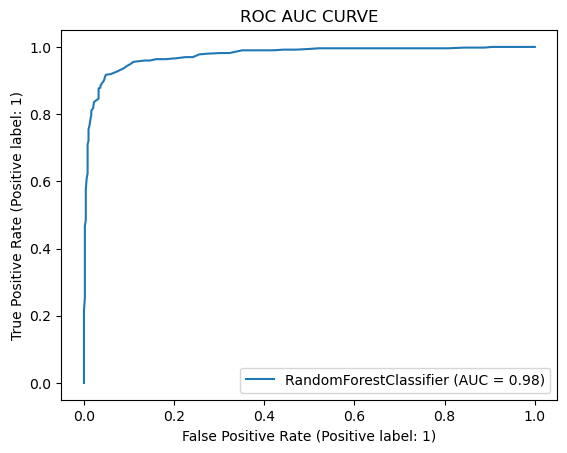





****************************** XGBClassifier ******************************
[21:16:17] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[21:16:17] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[21:16:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[21:16:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederr

<Figure size 500x500 with 0 Axes>

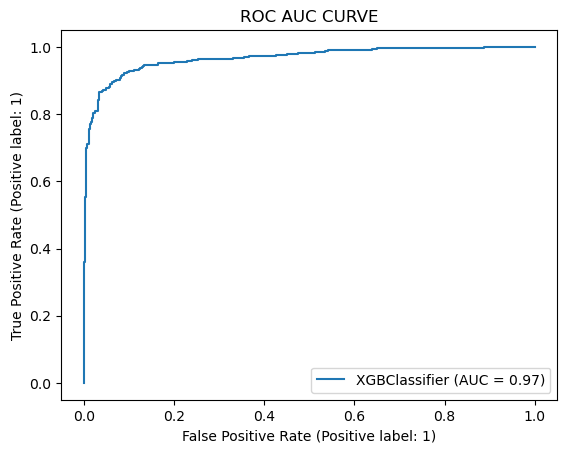

In [18]:
# Creating empty lists
Model = []
Acc_score = []
Model_score=[]
cvs = []
Precision_Score=[]
Roc_score=[]
Recall_score=[]
F1_Score=[]
Balanced_score=[]

for name,model in models:
    print("******************************",name,"******************************")
    # Determining Best Random State
    
    max_score=0
    for r_state in range (20,40):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.40)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        acc_score=accuracy_score(y_test,pred)
        if acc_score>max_score:
            max_score=acc_score
            final_r_state=r_state
    print("The maximum accuracy score of", name ,"is", max_score, "is achieved at", final_r_state)
    print("\n")
    
    #Model.append(name)
    Model.append(name)
    model.fit(x_train,y_train)
    print('\n')
    
    #print(model)
    y_pred=model.predict(x_test)
    
    # Accuracy Score
    acc_score=accuracy_score(y_test,y_pred)*100
    print('Accuracy_Score: ',acc_score)
    Acc_score.append(acc_score)
    print('\n')
    
    #trainning score
    pred_train=model.predict(x_train)
    Score=accuracy_score(y_train,pred_train)*100
    print(f"Accuracy Score of Model  : {(accuracy_score(y_train,pred_train)*100)}")
    Model_score.append(Score)
    print('\n')
    
    #roc_score
    auc_score=roc_auc_score(y_test,y_pred)*100
    print('AUC_Score:',auc_score)
    Roc_score.append(auc_score)
    print('\n')
    
    # Cross Validation Score
    cv=cross_val_score(model,x,y,cv=5,scoring='accuracy').mean()*100
    print('Cross Validation Score: ',cv)
    cvs.append(cv)
    print('\n')
    
    #Pricision Score
    print('Precision Score:', precision_score(y_test,y_pred)*100)
    pre_score=precision_score(y_test,y_pred)*100
    Precision_Score.append(pre_score)
    print('\n')
    
    # Recall Score
    recal_score=recall_score(y_test,y_pred)*100
    print('Recall_Score: ',recal_score)
    Recall_score.append(recal_score)
    print('\n')

    #Balanced Accuracy Score
    bal_score=balanced_accuracy_score(y_test,y_pred)*100
    print('Balanced Accuracy_Score: ',bal_score)
    Balanced_score.append(bal_score)
    print('\n')
    
    # f1 Score
    f1_scor=f1_score(y_test,y_pred)*100
    print('F1 Score: ',f1_scor)
    F1_Score.append(f1_scor)
    print('\n')
    
    # Confusion Matrix
    print('Confusion matrix: \n')
    cm=confusion_matrix(y_test,y_pred)
    print(cm)
    print("\n")
    
    # Classification Report
    print('Classification Report:\n ')
    print(classification_report(y_test,y_pred))
    
    #roc_curve
    plt.figure(figsize=(5,5))
    plot_roc_curve(model,x_test,y_test)
    plt.title('ROC AUC CURVE')
    plt.show()
    print('\n')
    print('\n')

In [19]:
# Displaying Scores and metrics:
Results=pd.DataFrame({'Model': Model,'Accuracy Score': Acc_score,'Dataset_score':Model_score,'Cross Validation Score':cvs,
                      'Precision':Precision_Score,'Recall_Score':Recall_score,'F1_Score':F1_Score,'Balanced_Score':Balanced_score,
                      'Roc_Score':Roc_score,}) 
Results

,Model,Accuracy Score,Dataset_score,Cross Validation Score,Precision,Recall_Score,F1_Score,Balanced_Score,Roc_Score
0,LogisticRegression,74.974671,75.388776,74.980168,74.749499,75.506073,75.125881,74.974132,74.974132
1,MultinomialNB,70.111449,69.168357,68.976686,71.035941,68.016194,69.493278,70.113574,70.113574
2,GaussianNB,71.124620,70.520622,70.398042,71.370143,70.647773,71.007121,71.125104,71.125104
3,Bernoulli,67.882472,66.599053,66.345025,68.399168,66.599190,67.487179,67.883774,67.883774
4,DecisionTreeClassifier,80.952381,100.000000,82.283795,79.310345,83.805668,81.496063,80.949487,80.949487
5,KneighborsClassifier,76.697062,84.854632,79.563607,69.075145,96.761134,80.607083,76.676713,76.676713
6,AdaBoostClassifier,88.449848,89.993239,85.208711,88.306452,88.663968,88.484848,88.449631,88.449631
7,GradientBoostingClassifier,92.198582,96.484111,88.415222,95.032397,89.068826,91.954023,92.201756,92.201756
8,RandomForestClassifier,92.907801,100.000000,92.909724,94.915254,90.688259,92.753623,92.910052,92.910052
9,XGBClassifier,91.489362,100.000000,88.980299,92.355372,90.485830,91.411043,91.490379,91.490379


As we know that best model is diffrence between Accuracy_score(92.90%) and Cross_validation_score(92.91%) is low. So here we got
"Random Forest Classifier" have minimum diffrence between them. But when we also check its Precision_score and F1_score is also
best And model gives highest ROC_score and Auc score.

But here we found that Gradient_boosting_classifier, Random_forest_classifier and XGBClassifier also give best score so combine
them and check accuracy of these model by the help of voting classifier.

# Voting Classifier(voting=Hard)

In [19]:
from sklearn.ensemble import VotingClassifier
voting=VotingClassifier(estimators=[('XG',XG),('GR',GR),('RF',RF)],voting='hard')
voting.fit(x_train,y_train)
y_pred=voting.predict(x_test)
print(f"Accuracy Score   : {(accuracy_score(y_test,y_pred)*100)}")  #accuracy score
print(f"Dataset Score : {(voting.score(x_train,y_train))*100}")   #dataset score
print(f"Precision_score:{(precision_score(y_test,y_pred))*100}")  #precision score
print(f"Recall_score:{recall_score(y_test, y_pred)*100}")   #recallscore
print(f"F1_score:{f1_score(y_test, y_pred)*100}")
print(f"Auc_score:{roc_auc_score(y_test,y_pred)*100}")   #auc score
print(f"Recall_score:{recall_score(y_test,y_pred)*100}")   #recall score

[21:18:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
Accuracy Score   : 93.51570415400202
Dataset Score : 100.0
Precision_score:95.94017094017094
Recall_score:90.89068825910931
F1_score:93.34719334719335
Auc_score:93.51836644192788
Recall_score:90.89068825910931


As we see that our F1_score 93.01% is increase comapred to Random_forest_classifier 91.80%. But we check once time again with change
its voting hard to soft.

# Voting Classifier(voting = soft)

In [20]:
from sklearn.ensemble import VotingClassifier
voting=VotingClassifier(estimators=[('XG',XG),('GR',GR),('RF',RF)],voting='soft')
voting.fit(x_train,y_train)
y_pred=voting.predict(x_test)
print(f"Accuracy Score   : {(accuracy_score(y_test,y_pred)*100)}")  #accuracy score
print(f"Dataset Score : {(voting.score(x_train,y_train))*100}")   #dataset score
print(f"Precision_score:{(precision_score(y_test,y_pred))*100}")  #precision score
print(f"Recall_score:{recall_score(y_test, y_pred)*100}")   #recallscore
print(f"F1_score:{f1_score(y_test, y_pred)*100}")     #f1_score
print(f"Auc_score:{roc_auc_score(y_test,y_pred)*100}")   #auc score
print(f"Recall_score:{recall_score(y_test,y_pred)*100}")   #recall score

[21:18:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
Accuracy Score   : 93.61702127659575
Dataset Score : 100.0
Precision_score:95.36842105263158
Recall_score:91.7004048582996
F1_score:93.49845201238392
Auc_score:93.61896510663459
Recall_score:91.7004048582996


 here our goes down to voting classifier(soft). so we choose voting classifier(soft) as best model. 
    
    Now we have two model so we apply Hypertuning on Random Forest Classifier and Voting Classifier(soft)

# Hypertuning On Random Forest Classifier

In [23]:
dict1={'criterion':['gini','entropy','log_loss'],'max_features':['sqrt','log2','None'],'n_estimators':[100,200,300,400,500],
      'max_depth':[3,4,5,6,7]}

In [24]:
Gs=GridSearchCV(RF,dict1,cv=5,n_jobs=1, verbose=1)
Gs.fit(x,y)

Fitting 5 folds for each of 225 candidates, totalling 1125 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5, 6, 7],
                         'max_features': ['sqrt', 'log2', 'None'],
                         'n_estimators': [100, 200, 300, 400, 500]},
             verbose=1)

In [25]:
Gs.best_score_

0.8994850990794196

In [26]:
Gs.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'log2',
 'n_estimators': 300}

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Confusion Matrix : [[444  49]
 [ 56 438]]
Classification Report :               precision    recall  f1-score   support

           0       0.89      0.90      0.89       493
           1       0.90      0.89      0.89       494

    accuracy                           0.89       987
   macro avg       0.89      0.89      0.89       987
weighted avg       0.89      0.89      0.89       987

Accuracy Score of Model  : 89.36170212765957


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.1s finished


Dataset Score : 96.4841108857336
Precision Score: 89.93839835728953
Recall_score:88.66396761133603
F1_score:89.29663608562693


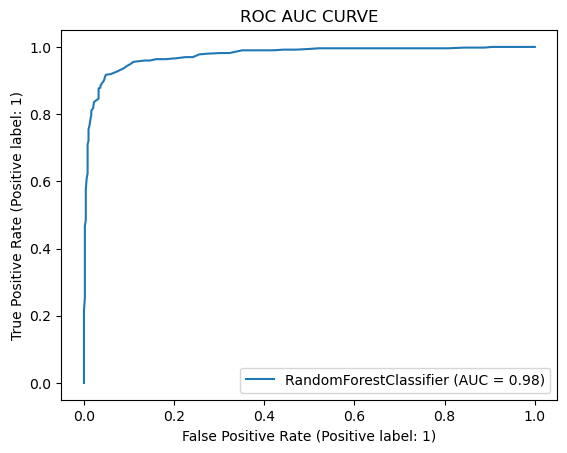

In [27]:
Rfc=RandomForestClassifier(criterion='gini',max_features='log2',n_estimators=300,max_depth=7,n_jobs=1, verbose=1)
Rfc.fit(x_train,y_train)
pred_test=Rfc.predict(x_test)
print(f"Confusion Matrix : {confusion_matrix(y_test,pred_test)}")
print(f"Classification Report : {classification_report(y_test,pred_test)}")
print(f"Accuracy Score of Model  : {(accuracy_score(y_test,pred_test)*100)}")  #accuracy score of testing data
print(f"Dataset Score : {(Rfc.score(x_train,y_train))*100}")    #model working with dataset
print('Precision Score:', precision_score(y_test,pred_test)*100)   #precision score for how accurate our prediction
print(f"Recall_score:{recall_score(y_test,pred_test)*100}")   #recall score
print(f"F1_score:{f1_score(y_test,pred_test)*100}")  #f1_score
plot_roc_curve(RF,x_test,y_test)   # roc currve
plt.title('ROC AUC CURVE')
plt.show()